## Proof of Concept

C:\Users\saman\AppData\Local\Temp\ipykernel_29300\3261509808.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Month Name'] = df_filtered['Month of Death'].map(month_names)
C:\Users\saman\AppData\Local\Temp\ipykernel_29300\3261509808.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['ICD Range'] = df_filtered['ICD Code'].apply(categorize_icd)
C:\Users\saman\AppData\Local\Temp\ipykernel_29300\3261509808.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

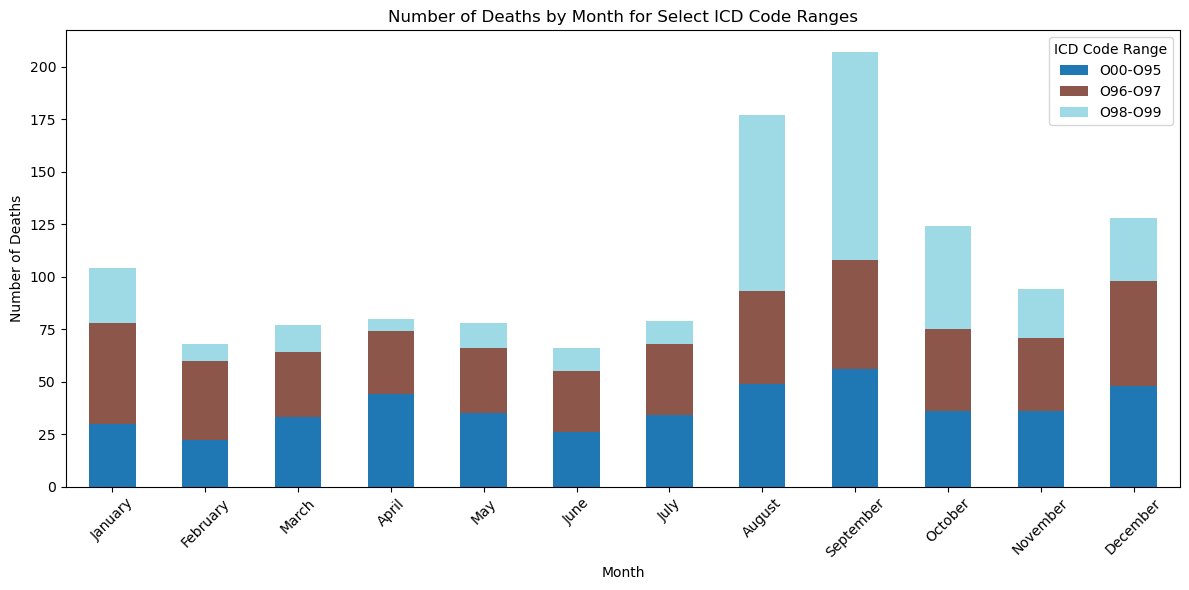

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

colspecs = [
    (19, 20),  # Resident Status
    (62, 63),  # Education
    (64, 67),  # Month of Death
    (68, 69),  # Sex
    (76, 78),  # Age Recode 27
    (83, 84),  # Marital Status
    (101, 105), # Year
    (145, 149),  # ICD Code (10th Revision)
    (444, 446),  # Race (2013-2020)
    (488, 490),  # Race (2021)
    (449, 450),  # Race (2022+)
]
column_names = ["Resident Status", "Education", "Month of Death", "Sex", "Age Recode 27", "Marital Status", "Year", "ICD Code", "Race (2013-2020)", "Race (2021)", "Race (2022+)"]

# Read the fixed-width file
df = pd.read_fwf('VS21MORT.DUSMCPUB_r20230320.txt', colspecs=colspecs, names=column_names, dtype=str)

# Define conditions for the ICD code ranges
conditions = (
    df['ICD Code'].str.startswith('O') &
    (
        df['ICD Code'].between('O00', 'O95', inclusive='left') |
        df['ICD Code'].between('O96', 'O97', inclusive='left') |
        df['ICD Code'].between('O98', 'O99', inclusive='left')
    )
)

# Filter entries based on conditions
df_filtered = df[conditions]

# Map numeric month values to month names
month_names = {
    '01': 'January', '02': 'February', '03': 'March',
    '04': 'April', '05': 'May', '06': 'June',
    '07': 'July', '08': 'August', '09': 'September',
    '10': 'October', '11': 'November', '12': 'December'
}

df_filtered['Month Name'] = df_filtered['Month of Death'].map(month_names)

# Additional column to categorize ICD Code ranges
def categorize_icd(icd_code):
    if 'O00' <= icd_code <= 'O95':
        return 'O00-O95'
    elif 'O96' <= icd_code <= 'O97':
        return 'O96-O97'
    elif 'O98' <= icd_code <= 'O99':
        return 'O98-O99'
    return 'Other'

df_filtered['ICD Range'] = df_filtered['ICD Code'].apply(categorize_icd)

# Define month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'Month Name' to a categorical type with specified order
df_filtered['Month Name'] = pd.Categorical(df_filtered['Month Name'], categories=month_order, ordered=True)

# Pivot table for stacking
df_pivot = df_filtered.pivot_table(index='Month Name', columns='ICD Range', aggfunc='size', fill_value=0)

# Plotting the stacked bar chart
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

# Customizing the plot
plt.title('Number of Deaths by Month for Select ICD Code Ranges')
plt.xlabel('Month')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.legend(title='ICD Code Range')
plt.tight_layout()

# Show the plot
plt.show()

## Import Mortality Data

In [163]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

colspecs = [
    (19, 20),  # Resident Status
    (62, 63),  # Education
    (64, 67),  # Month of Death
    (68, 69),  # Sex
    (76, 78),  # Age Recode 27
    (69, 73),  # Detail Age
    (83, 84),  # Marital Status
    (101, 105), # Current Data Year
    (145, 149),  # ICD Code (10th Revision)
    (444, 446),  # Race (2013-2021)
    (488, 490),  # Race (2021)
    (449, 450),  # Race (2022+)
]
column_names = ["Resident Status", "Education", "Month of Death", "Sex", "Age Recode 27", "Detail Age", "Marital Status", "Year", "ICD Code", "Race (2013-2020)", "Race (2021)", "Race (2022+)"]

# List of file paths
files = [
    'VS23MORT.DUSMCPUB_r20241030',
    'VS22MORT.DUSMCPUB_r20240307',
    'VS21MORT.DUSMCPUB_r20230320.txt',
    'VS20MORT.DUSMCPUB_r20220105',
    'VS19MORT.DUSMCPUB_r20210304',
    'Mort2018US.PubUse.txt',
    'VS17MORT.DUSMCPUB',
    'VS16MORT.DUSMCPUB',
    'VS15MORT.DUSMCPUB',
    'VS14MORT.DUSMCPUB',
    'VS13MORT.DUSMCPUB'
]

# Initialize an empty list to hold DataFrames
dataframes_filtered = []
dataframes_full = []

# Additional column to categorize ICD Code ranges
def categorize_icd(icd_code):
    if 'O00' <= icd_code <= 'O95':
        return 'O00-O95'
    elif 'O96' <= icd_code <= 'O97':
        return 'O96-O97'
    elif 'O98' <= icd_code <= 'O99':
        return 'O98-O99'
    return 'Other'
    
# Loop over the file paths to read each one
for file in files:
    df = pd.read_fwf(file, colspecs=colspecs, names=column_names, dtype=str)
    dataframes_full.append(df)
    # Define conditions for the ICD code ranges of obstectric related deaths
    conditions = (
        df['ICD Code'].str.startswith('O') &
        (
            df['ICD Code'].between('O00', 'O95', inclusive='left') |
            df['ICD Code'].between('O96', 'O97', inclusive='left') |
            df['ICD Code'].between('O98', 'O99', inclusive='left')
        )
    )
    df_filtered = df[conditions] # Filter for obstectric related deaths
    print("file " + file + " parsed")
    #print(df.head())  # Check the first few rows
    dataframes_filtered.append(df_filtered)


# Concatenate all DataFrames into one
df = pd.concat(dataframes_filtered, ignore_index=True)
df_full = pd.concat(dataframes_full, ignore_index=True)
df['ICD Range'] = df['ICD Code'].apply(categorize_icd)

# Mapping from 2013-2020 race codes to 2022 Race Recode 6 codes
race_mapping_2013 = {
    '01': '1',  # White (only)
    '02': '2',  # Black (only)
    '03': '3',  # American Indian (includes Aleuts and Eskimos): American Indian and Alaska Native (only)
    '04': '4',  # Chinese: Asian (only)
    '05': '4',  # Japanese: Asian (only)
    '06': '5',  # Hawaiian (includes Part-Hawaiian): Native Hawaiian or Other Pacific Islander (only)
    '07': '4',  # Filipino: Asian
    '18': '4',  # Asian Indian: Asian (only)
    '28': '4',  # Korean: Asian (only)
    '38': '5',  # Samoan: Native Hawaiian or Other Pacific Islander (only)
    '48': '4',  # Vietnamese: Asian (only)
    '58': '5',  # Guamanian: Native Hawaiian or Other Pacific Islander (only)
    '68': '4',  # Other Asian or Pacific Islander in areas reporting codes 18-58: Asian (only) 
    '78': '4',  # Combined other Asian or Pacific Islander, includes codes 18-68for areas that do not report them separately: Asian (only)
    # Acknowledging the last two are not perfect mappings and is not split up in a way that lends to the new categories
    # Also provides no data on mixed/more than one race during this time
}
# Mapping from 2021 race codes to 2022 Race Recode 6 codes
race_mapping_2021 = {
    '01': '1',  # White (only)
    '02': '2',  # Black (only)
    '03': '3',  # American Indian and Alaska Native (only)
    '04': '4',  # Asian (only)
    '05': '4',  # Asian (only)
    '06': '4',  # Asian (only)
    '07': '4',  # Asian (only)
    '08': '4',  # Asian (only)
    '09': '4',  # Asian (only)
    '10': '4',  # Asian (only)
    '11': '5',  # Native Hawaiian or Other Pacific Islander (only)
    '12': '5',  # Native Hawaiian or Other Pacific Islander (only)
    '13': '5',  # Native Hawaiian or Other Pacific Islander (only)
    '14': '5',  # Native Hawaiian or Other Pacific Islander (only)
    '15': '6',  # More than one race
    '16': '6',  # More than one race
    '17': '6',  # More than one race
    '18': '6',  # More than one race
    '19': '6',  # More than one race
    '20': '6',  # More than one race
    '21': '6',  # More than one race
    '22': '6',  # More than one race
    '23': '6',  # More than one race
    '24': '6',  # More than one race
    '25': '6',  # More than one race
    '26': '6',  # More than one race
    '27': '6',  # More than one race
    '28': '6',  # More than one race
    '29': '6',  # More than one race
    '30': '6',  # More than one race
    '31': '6',  # More than one race
    '32': '6',  # More than one race
    '33': '6',  # More than one race
    '34': '6',  # More than one race
    '35': '6',  # More than one race
    '36': '6',  # More than one race
    '37': '6',  # More than one race
    '38': '6',  # More than one race
    '39': '6',  # More than one race
    '40': '6',  # More than one race
}


def map_race(row):
    if 2013 <= int(row['Year']) <= 2020:
        return race_mapping_2013.get(row['Race (2013-2020)'], row['Race (2022+)'])
    elif int(row['Year']) == 2021:
        return race_mapping_2021.get(row['Race (2021)'], row['Race (2022+)'])
    return row['Race (2022+)']

df['Race (2022+)'] = df.apply(map_race, axis=1)
df_full['Race (2022+)'] = df_full.apply(map_race, axis=1)


# Convert 'Year' and 'Month of Death' to integers
df['Year'] = df['Year'].astype(int)
df['Month of Death'] = df['Month of Death'].str.strip().astype(int)
df_full['Year'] = df_full['Year'].astype(int)
df_full['Month of Death'] = df_full['Month of Death'].str.strip().astype(int)

# Create a 'Year-Month' column for combined filtering
df['Year-Month'] = df['Year'].astype(str) + '-' + df['Month of Death'].astype(str).str.zfill(2)
df_full['Year-Month'] = df_full['Year'].astype(str) + '-' + df_full['Month of Death'].astype(str).str.zfill(2)

df_full.rename(columns={"Race (2022+)": "Race"}, inplace=True)

print("...")
print("mortality data compiled")

file VS23MORT.DUSMCPUB_r20241030 parsed
file VS22MORT.DUSMCPUB_r20240307 parsed
file VS21MORT.DUSMCPUB_r20230320.txt parsed
file VS20MORT.DUSMCPUB_r20220105 parsed
file VS19MORT.DUSMCPUB_r20210304 parsed
file Mort2018US.PubUse.txt parsed
file VS17MORT.DUSMCPUB parsed
file VS16MORT.DUSMCPUB parsed
file VS15MORT.DUSMCPUB parsed
file VS14MORT.DUSMCPUB parsed
file VS13MORT.DUSMCPUB parsed
...
mortality data compiled


## Number of Deaths by Month for Select ICD Code Ranges
The CDC measures mortality using O00-O95 and O98-O99 mostly and excludes O96 and O97 because they are deaths that are related to obstectrics/birth but that occur later or as a series of medical events that began or was greatly exacerbated by birth. I feel they are important to account for but will defer to the CDC for specific maternal mortlaity statistics

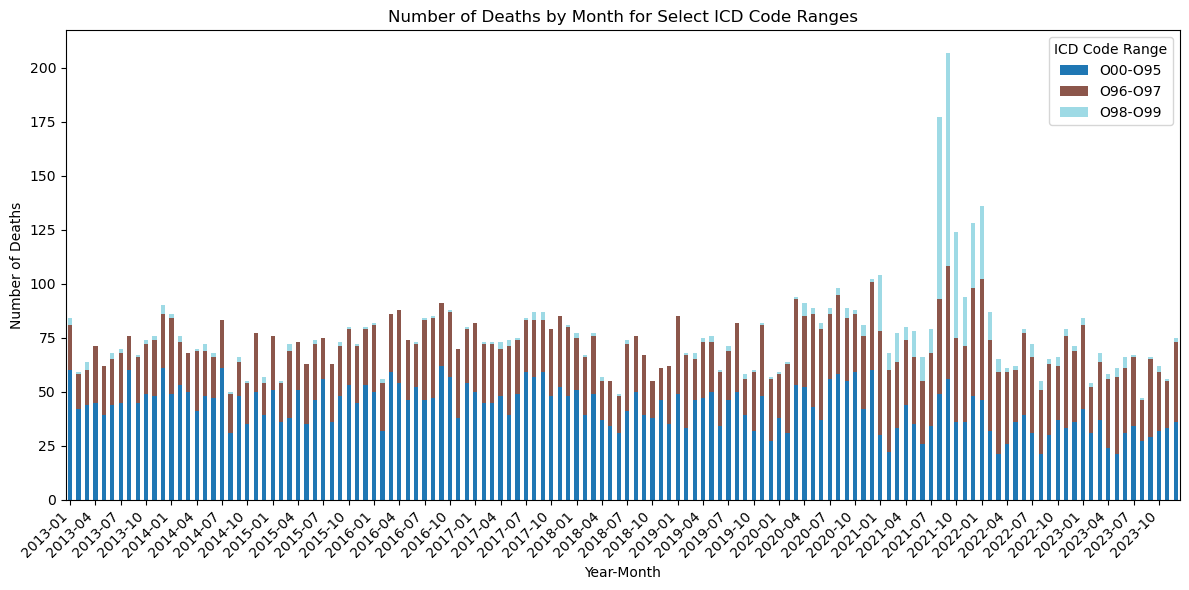

In [70]:
# Aggregate total deaths per 'Year-Month'
monthly_yearly_deaths = df['Year-Month'].value_counts().reset_index()
monthly_yearly_deaths.columns = ['Year-Month', 'Total Deaths']

# Sort by 'Year-Month' to ensure chronological order
monthly_yearly_deaths = monthly_yearly_deaths.sort_values('Year-Month')

# Convert Year-Month to datetime for plotting purposes
monthly_yearly_deaths['Year-Month'] = pd.to_datetime(monthly_yearly_deaths['Year-Month'], format='%Y-%m')

df_pivot = df.pivot_table(index='Year-Month', columns='ICD Range', aggfunc='size', fill_value=0) #pivot for stacking
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20') # Plotting the stacked bar chart

# Customize x-ticks to show every third month
months = monthly_yearly_deaths['Year-Month'].dt.strftime('%Y-%m').tolist()
plt.xticks(ticks=range(0, len(months), 3), labels=[months[i] for i in range(0, len(months), 3)], rotation=45, ha='right')

# Customizing the plot
plt.title('Number of Deaths by Month for Select ICD Code Ranges')
plt.xlabel('Year-Month')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.legend(title='ICD Code Range')
plt.tight_layout()

# Show the plot
plt.show()


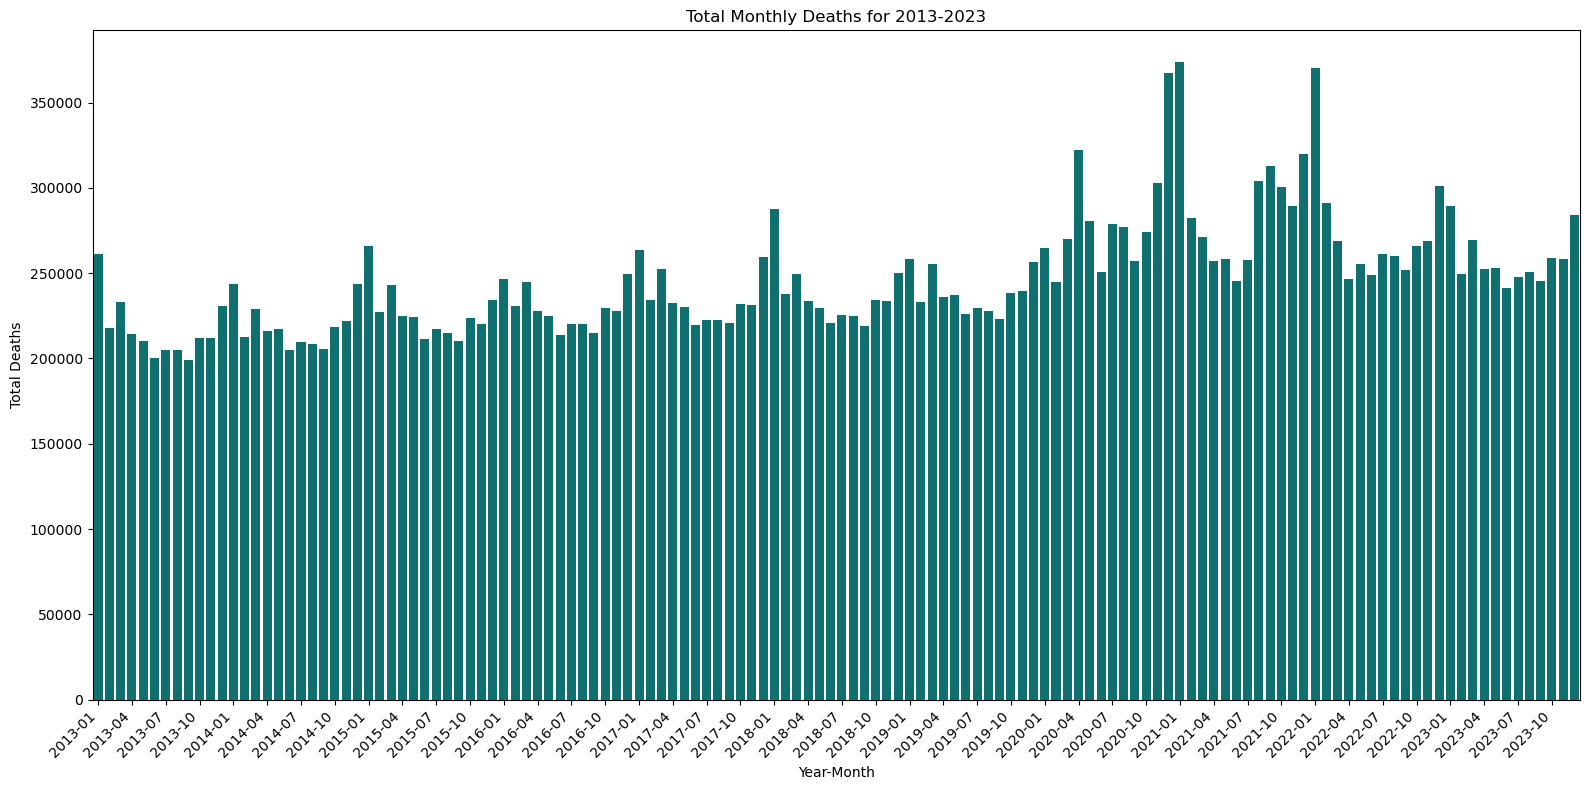

In [106]:
# Group by 'Year-Month' and count entries
monthly_deaths = df_full.groupby('Year-Month').size().reset_index(name='Total Deaths')

# Sort by 'Year-Month' to ensure chronological order
monthly_deaths['Year-Month'] = pd.to_datetime(monthly_deaths['Year-Month'], format='%Y-%m')
monthly_deaths = monthly_deaths.sort_values('Year-Month')

# Plotting with seaborn
plt.figure(figsize=(16, 8))
sns.barplot(x=monthly_deaths['Year-Month'].dt.strftime('%Y-%m'), y=monthly_deaths['Total Deaths'], color='teal')

# Customize x-ticks to show every third month
months = monthly_yearly_deaths['Year-Month'].dt.strftime('%Y-%m').tolist()
plt.xticks(ticks=range(0, len(months), 3), labels=[months[i] for i in range(0, len(months), 3)], rotation=45, ha='right')

# Set plot title and labels
plt.title('Total Monthly Deaths for 2013-2023')
plt.xlabel('Year-Month')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

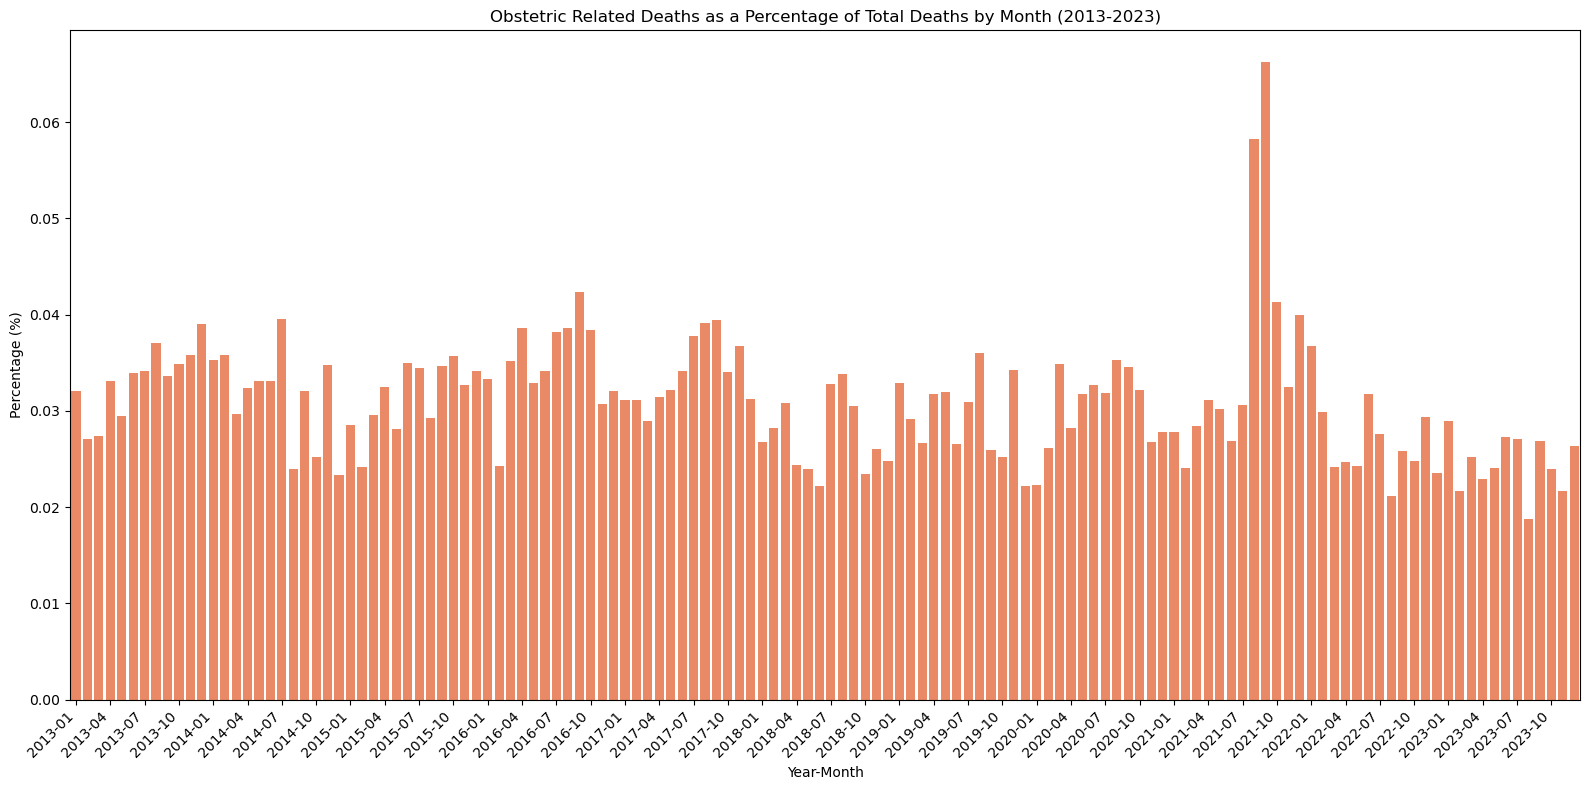

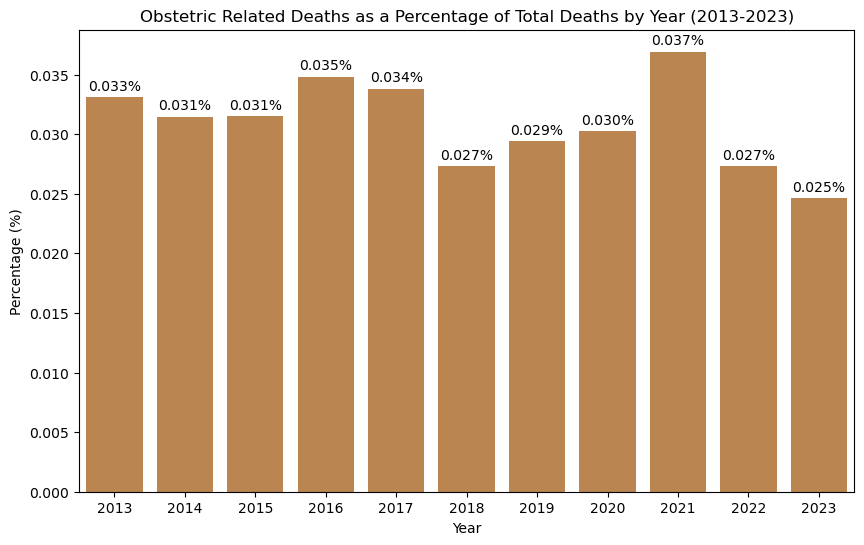

Highest percentage of obstetric-related deaths in any one month:
2021-09 with 0.07%
Average percentage of obstetric-related deaths over all months: 0.03%


In [302]:
# Calculate total deaths per month
monthly_total_deaths = df_full.groupby('Year-Month').size().reset_index(name='Total Deaths')
monthly_obstetric_deaths = df.groupby('Year-Month').size().reset_index(name='Obstetric Deaths')

# Merge total and obstetric deaths into a single DataFrame
monthly_deaths = pd.merge(monthly_total_deaths, monthly_obstetric_deaths, on='Year-Month', how='left').fillna(0)

# Calculate the percentage of obstetric-related deaths
monthly_deaths['Obstetric %'] = (monthly_deaths['Obstetric Deaths'] / monthly_deaths['Total Deaths']) * 100

# Calculate total and obstetric-related deaths per year
yearly_total_deaths = df_full.groupby('Year').size().reset_index(name='Total Deaths')
yearly_obstetric_deaths = df.groupby('Year').size().reset_index(name='Obstetric Deaths')
yearly_deaths = pd.merge(yearly_total_deaths, yearly_obstetric_deaths, on='Year', how='left').fillna(0)

# Calculate the yearly percentage of obstetric-related deaths
yearly_deaths['Obstetric %'] = (yearly_deaths['Obstetric Deaths'] / yearly_deaths['Total Deaths']) * 100

# Convert 'Year-Month' to datetime for plotting
monthly_deaths['Year-Month'] = pd.to_datetime(monthly_deaths['Year-Month'], format='%Y-%m')

# Plot monthly obstetric-related deaths as a percentage of total deaths
plt.figure(figsize=(16, 8))
sns.barplot(x=monthly_deaths['Year-Month'].dt.strftime('%Y-%m'), y=monthly_deaths['Obstetric %'], color='coral')
# Customize x-ticks to show every third month
months = monthly_yearly_deaths['Year-Month'].dt.strftime('%Y-%m').tolist()
plt.xticks(ticks=range(0, len(months), 3), labels=[months[i] for i in range(0, len(months), 3)], rotation=45, ha='right')
plt.title('Obstetric Related Deaths as a Percentage of Total Deaths by Month (2013-2023)')
plt.xlabel('Year-Month')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot yearly obstetric-related deaths as a percentage of total deaths
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=yearly_deaths['Year'].astype(str), y=yearly_deaths['Obstetric %'], color='peru')
plt.title('Obstetric Related Deaths as a Percentage of Total Deaths by Year (2013-2023)')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
# Add numerical labels on top of each bar
for bar, percentage in zip(barplot.patches, yearly_deaths['Obstetric %']):
    barplot.annotate(f'{percentage:.3f}%',
                     xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords='offset points',
                     ha='center', va='bottom')
plt.show()

# Calculate the maximum percentage of obstetric-related deaths for any one month
max_obstetric_percentage = monthly_deaths['Obstetric %'].max()

# Find the relevant 'Year-Month' entries
max_percentage_months = monthly_deaths[monthly_deaths['Obstetric %'] == max_obstetric_percentage]['Year-Month']

# Print the highest percentage of obstetric-related deaths for any one month
print("Highest percentage of obstetric-related deaths in any one month:")
for month in max_percentage_months:
    print(f"{month.strftime('%Y-%m')} with {max_obstetric_percentage:.2f}%")

# Calculate the average percentage of obstetric-related deaths over all months
average_obstetric_percentage = monthly_deaths['Obstetric %'].mean()

# Print the average percentage
print(f"Average percentage of obstetric-related deaths over all months: {average_obstetric_percentage:.2f}%")




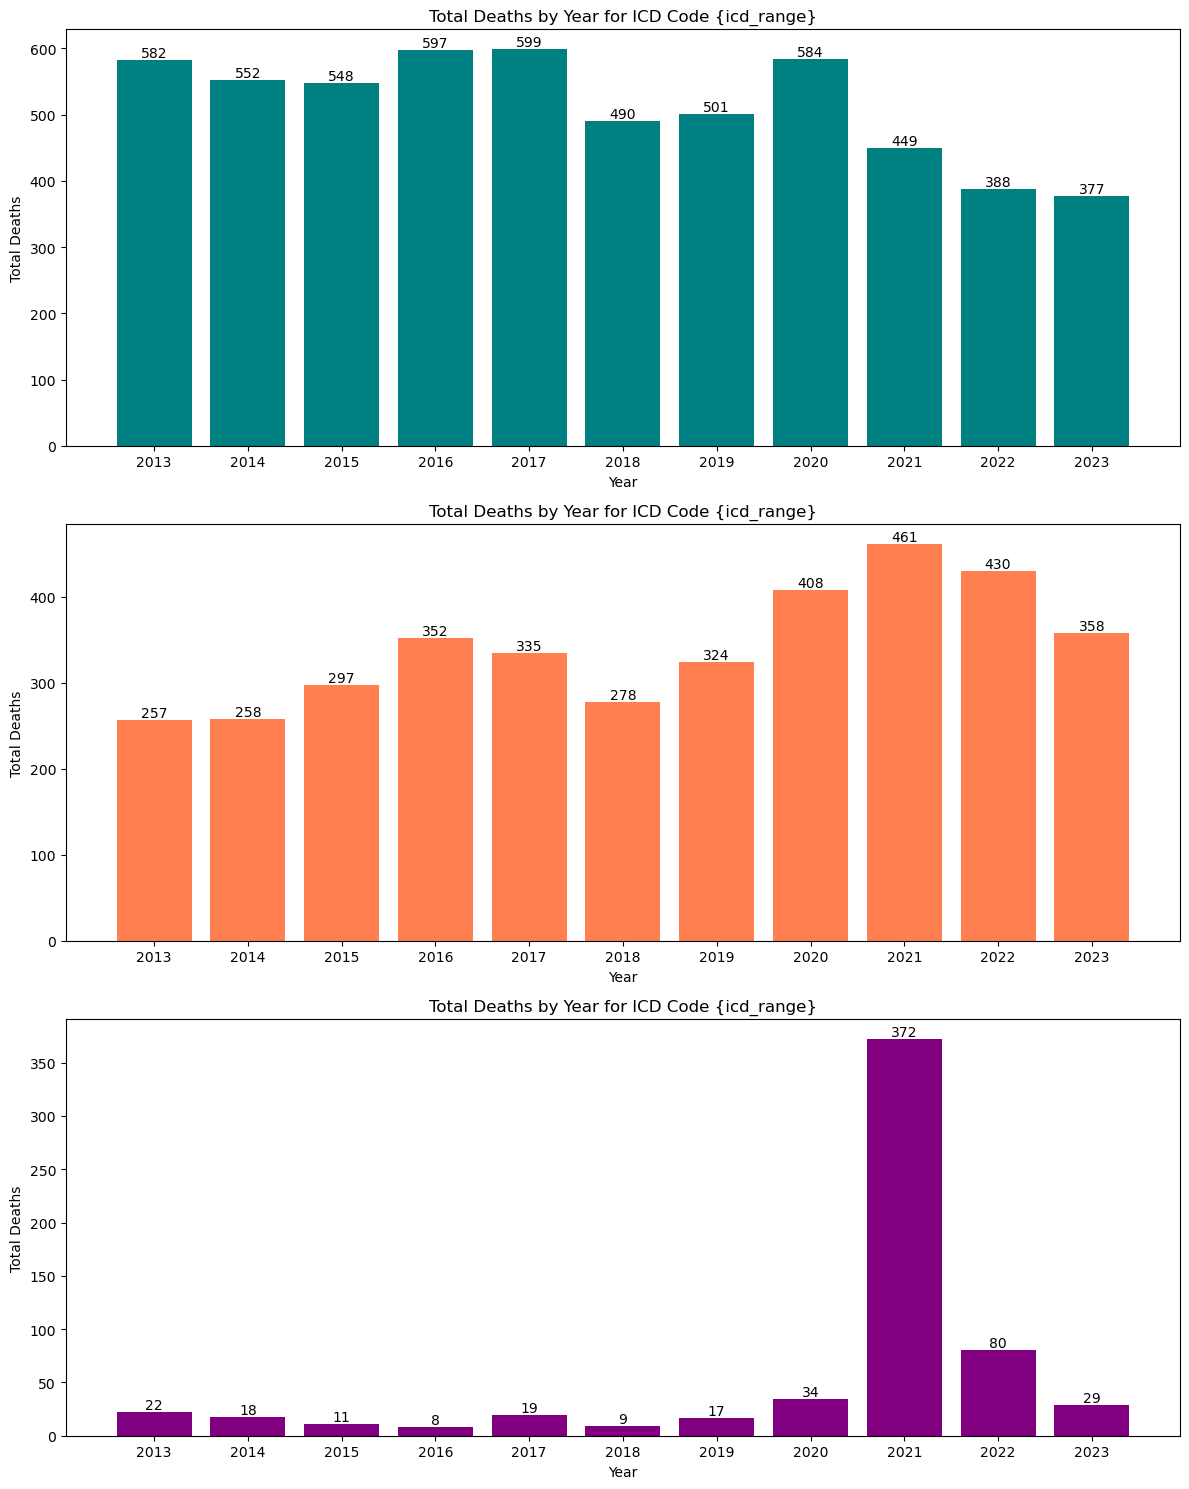

In [23]:
# Aggregate total deaths per year for each ICD range
yearly_deaths_by_icd = df.dropna(subset=['ICD Range']).groupby(['Year', 'ICD Range']).size().reset_index(name='Total Deaths')

# Setup plot
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Plot each ICD Range
icd_ranges = ['O00-O95', 'O96-O97', 'O98-O99']
colors = ['teal', 'coral', 'purple']

for i, icd_range in enumerate(icd_ranges):
    ax = axes[i]
    subset = yearly_deaths_by_icd[yearly_deaths_by_icd['ICD Range'] == icd_range]
    bars = ax.bar(subset['Year'].astype(str), subset['Total Deaths'], color=colors[i])
    ax.set_title('Total Deaths by Year for ICD Code {icd_range}')
    ax.set_ylabel('Total Deaths')
    ax.set_xlabel('Year')  # Add x-axis label to each subplot
    
    # Add total number labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}',
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

C:\Users\saman\AppData\Local\Temp\ipykernel_23852\671327664.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\saman\AppData\Local\Temp\ipykernel_23852\671327664.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\saman\AppData\Local\Temp\ipykernel_23852\671327664.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\saman\AppData\Local\Temp\ipykernel_23852\671327664.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=

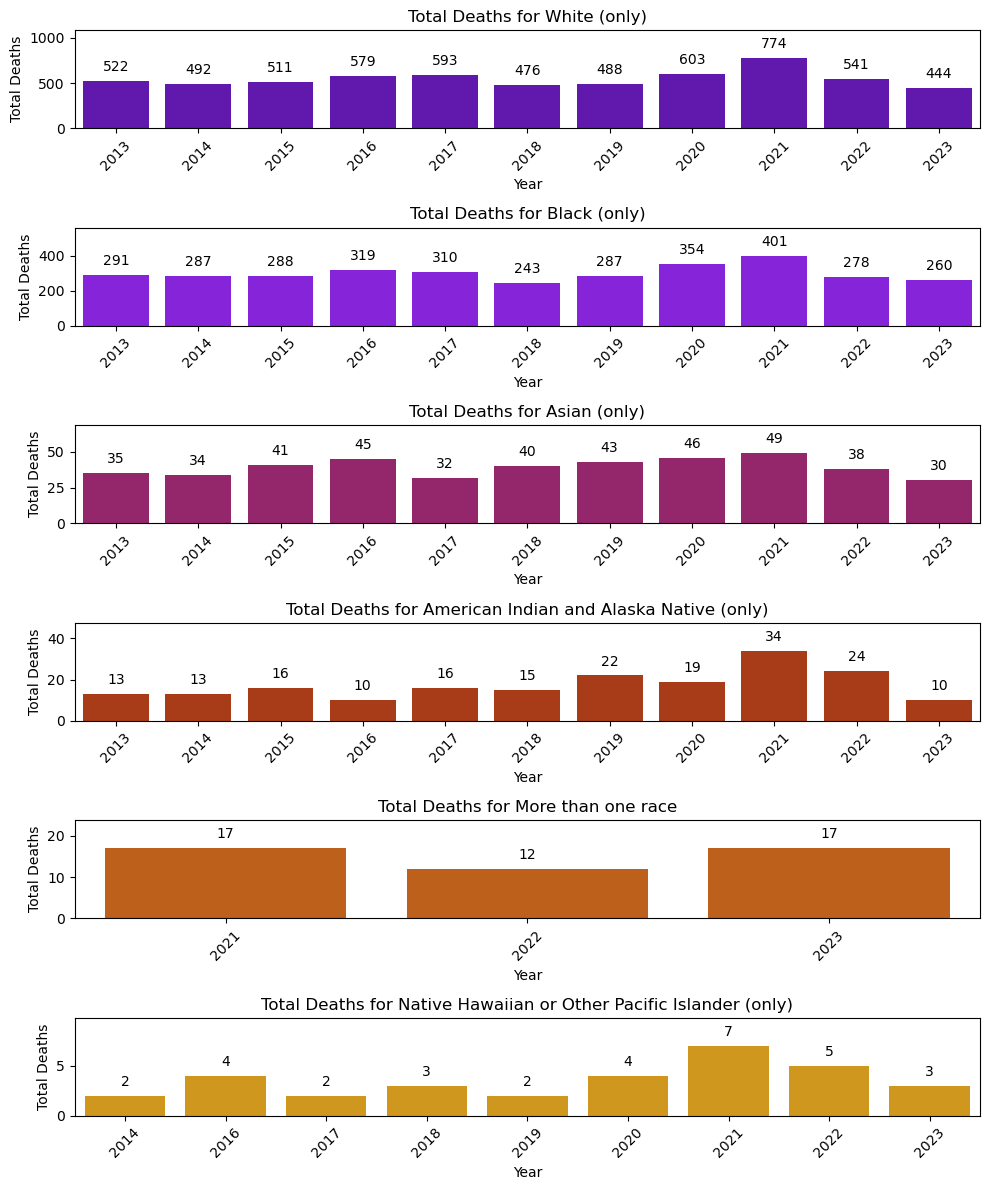

In [48]:
# Group and aggregate data by year and race (2022+)
year_race_deaths = df.groupby(['Year', 'Race (2022+)']).size().reset_index(name='Total Deaths')

# Define a dictionary to map race recode to more descriptive labels
race_labels = {
    '1': 'White (only)',
    '2': 'Black (only)',
    '3': 'American Indian and Alaska Native (only)',
    '4': 'Asian (only)',
    '5': 'Native Hawaiian or Other Pacific Islander (only)',
    '6': 'More than one race'
}

# Setup plot: Assign different colors for each plot
unique_races = df['Race (2022+)'].unique()
num_plots = len(unique_races)
# Define a color palette (one color per race group)
colors = sns.color_palette("gnuplot", num_plots)

# Adjust the total height of the plots
fig_height_per_plot = 2  # Adjust this number to make plots shorter or taller
fig, axes = plt.subplots(num_plots, 1, figsize=(10, fig_height_per_plot * num_plots))

# Loop over each unique race recode and plot
for ax, race_code, color in zip(axes, unique_races, colors):
    # Filter the data for the current race
    race_data = year_race_deaths[year_race_deaths['Race (2022+)'] == race_code]
    sns.barplot(x='Year', y='Total Deaths', data=race_data, ax=ax, color=color)
    
    # Calculate the maximum height of the bars
    max_height = race_data['Total Deaths'].max()
    # Add number labels on top of each bar
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f"{int(height)}",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # Offset to provide some space for the label
                    textcoords='offset points',
                    ha='center', va='bottom')
    
    # Adjust y-axis limit to create extra space at the top of the plot
    ax.set_ylim(0, max_height * 1.4)
    
    ax.set_title(f'Total Deaths for {race_labels.get(race_code, race_code)}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Total Deaths')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

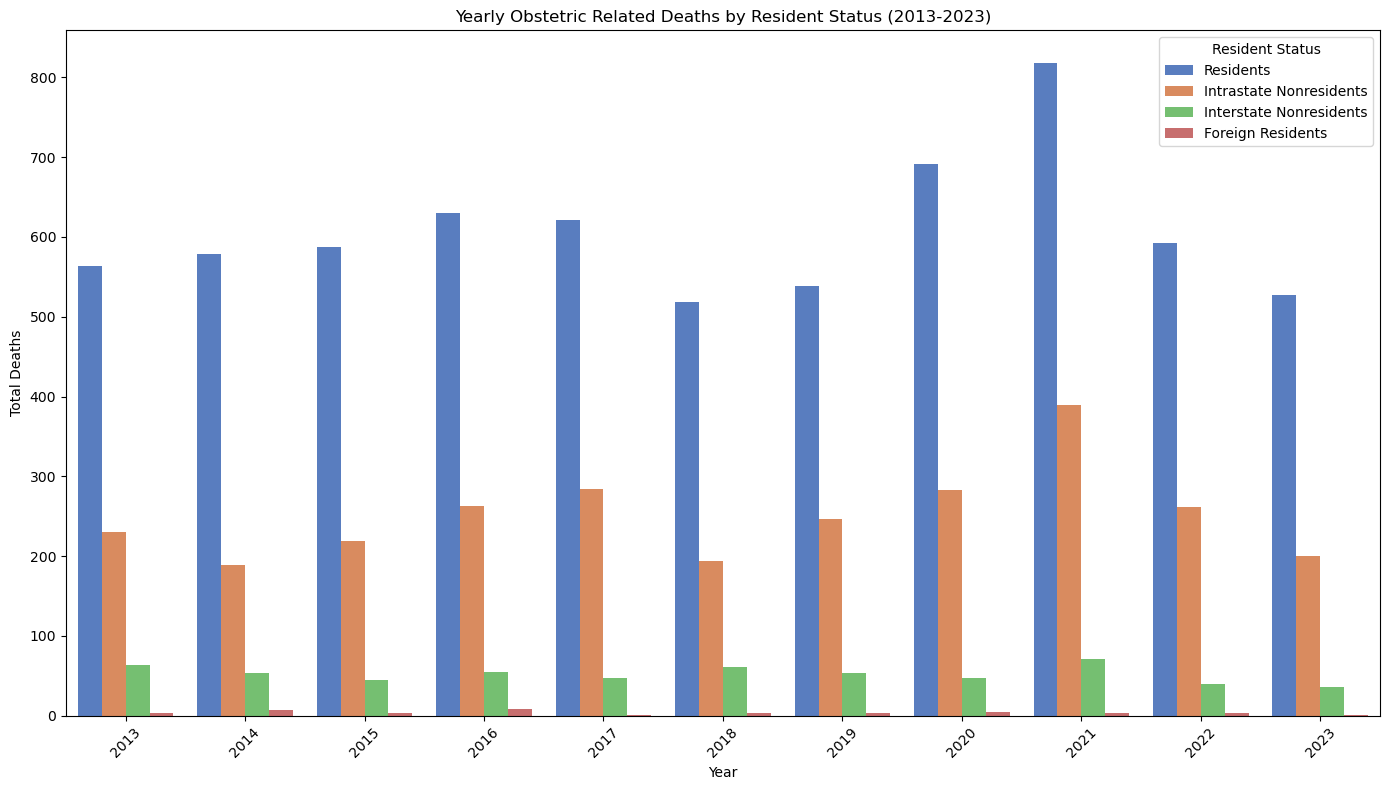

In [110]:
# Group and aggregate data by year and resident status
resident_status_deaths = df.groupby(['Year', 'Resident Status']).size().reset_index(name='Total Deaths')

# Define a mapping for resident status labels
resident_status_labels = {
    '1': 'Residents',
    '2': 'Intrastate Nonresidents',
    '3': 'Interstate Nonresidents',
    '4': 'Foreign Residents'
}
# Map the resident status codes to meaningful labels
resident_status_deaths['Resident Status Label'] = resident_status_deaths['Resident Status'].map(resident_status_labels)

# Create the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Year', y='Total Deaths', hue='Resident Status', data=resident_status_deaths, palette='muted')

# Set plot title and labels
plt.title('Yearly Obstetric Related Deaths by Resident Status (2013-2023)')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.legend(title='Resident Status')
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\saman\AppData\Local\Temp\ipykernel_29300\3997469721.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\saman\AppData\Local\Temp\ipykernel_29300\3997469721.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\saman\AppData\Local\Temp\ipykernel_29300\3997469721.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\saman\AppData\Local\Temp\ipykernel_29300\3997469721.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotat

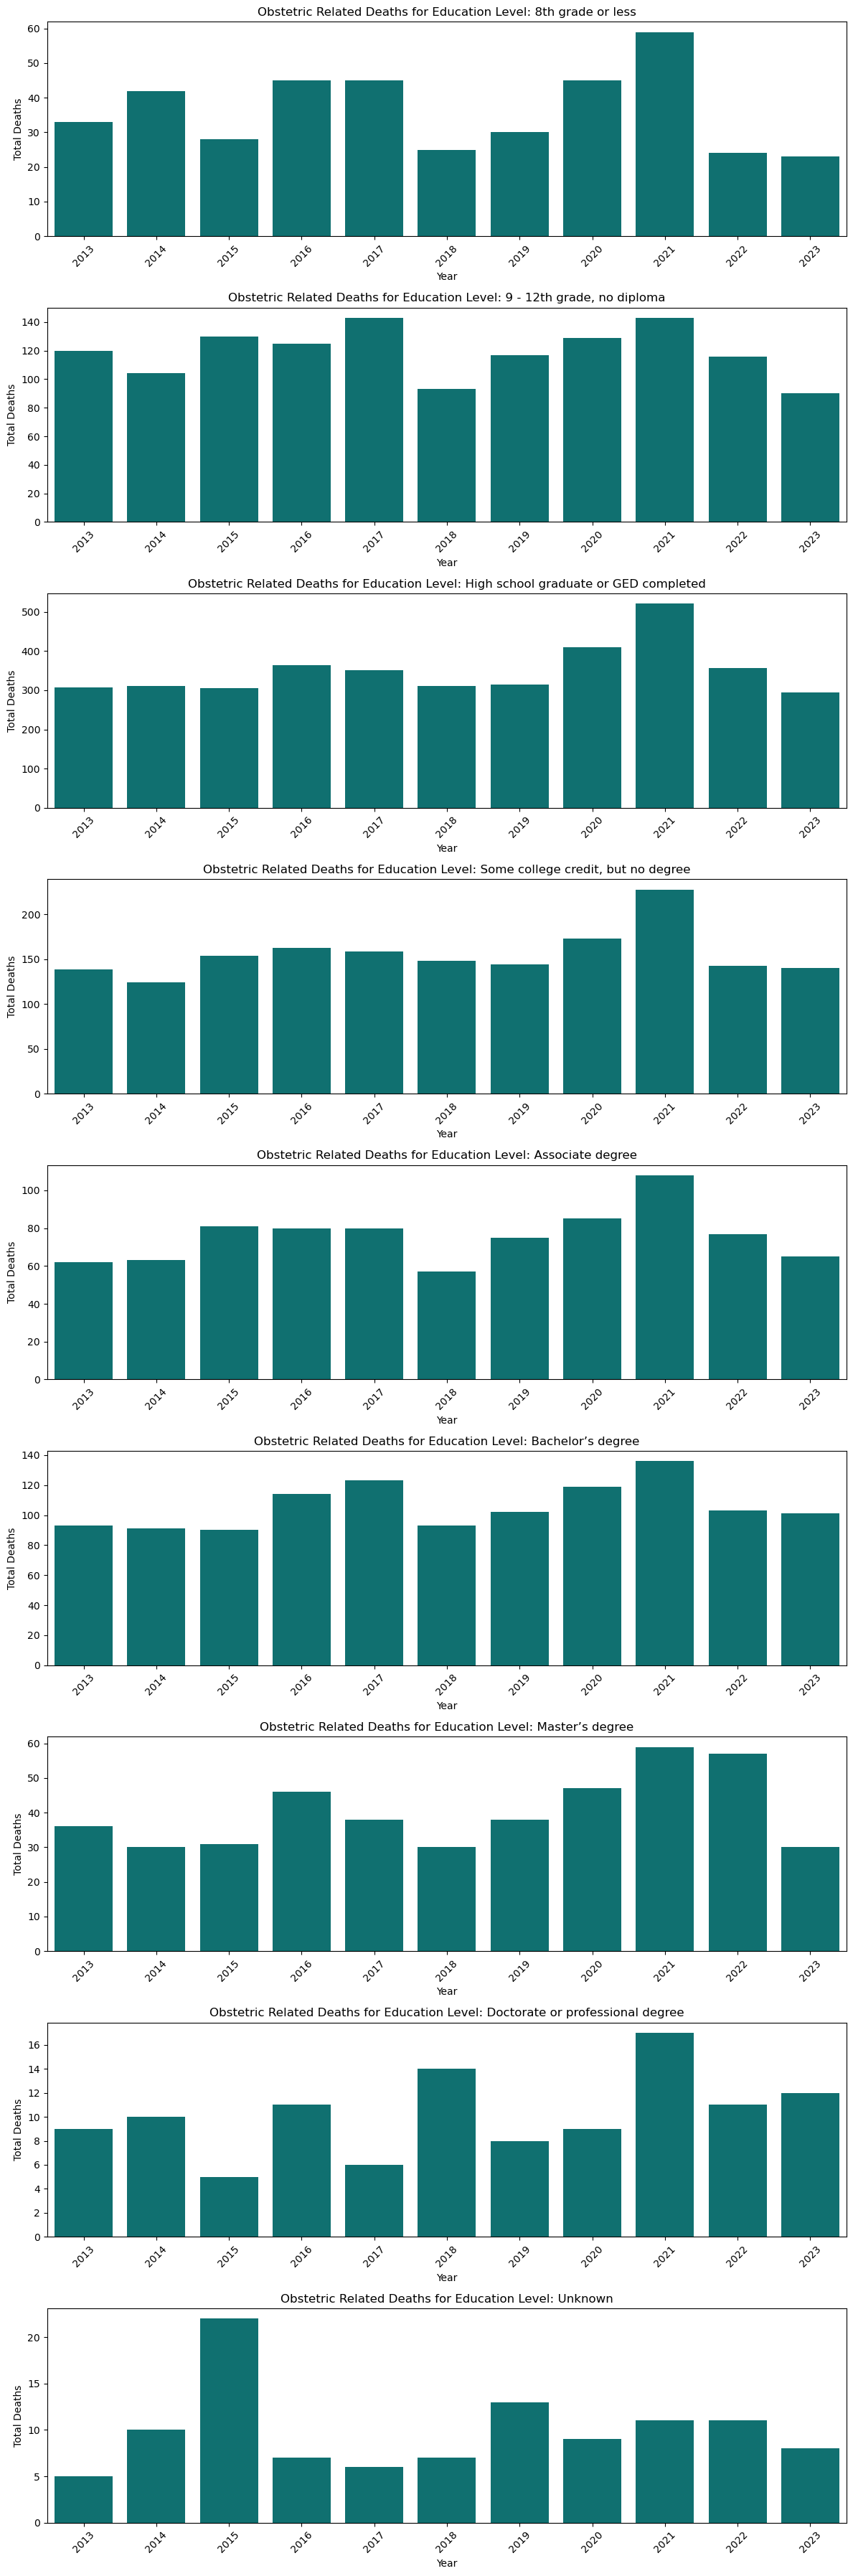

In [116]:
# Define education level labels
education_labels = {
    '1': '8th grade or less',
    '2': '9 - 12th grade, no diploma',
    '3': 'High school graduate or GED completed',
    '4': 'Some college credit, but no degree',
    '5': 'Associate degree',
    '6': 'Bachelor’s degree',
    '7': 'Master’s degree',
    '8': 'Doctorate or professional degree',
    '9': 'Unknown'
}

# Map the education levels to meaningful labels
df['Education Label'] = df['Education'].map(education_labels)

# Group and aggregate data by year and education label
education_deaths = df.groupby(['Year', 'Education Label']).size().reset_index(name='Total Deaths')

# Define the order for the education levels
ordered_education_levels = [
    '8th grade or less',
    '9 - 12th grade, no diploma',
    'High school graduate or GED completed',
    'Some college credit, but no degree',
    'Associate degree',
    'Bachelor’s degree',
    'Master’s degree',
    'Doctorate or professional degree',
    'Unknown'
]

# Filter the education deaths DataFrame to include only ordered levels and enforce order
education_deaths = education_deaths[education_deaths['Education Label'].isin(ordered_education_levels)]
education_deaths['Education Label'] = pd.Categorical(education_deaths['Education Label'], categories=ordered_education_levels, ordered=True)

# Setup the subplot structure
fig, axes = plt.subplots(len(ordered_education_levels), 1, figsize=(12, 4 * len(ordered_education_levels)))

# Loop over each ordered education level and plot
for ax, education_level in zip(axes, ordered_education_levels):
    # Filter the data for the current education level
    education_data = education_deaths[education_deaths['Education Label'] == education_level]
    sns.barplot(x='Year', y='Total Deaths', data=education_data, ax=ax, color='teal')
    ax.set_title(f'Obstetric Related Deaths for Education Level: {education_level}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Total Deaths')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

C:\Users\saman\AppData\Local\Temp\ipykernel_23852\702856708.py:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_deaths_by_year = df.groupby(['Year', 'Age Group']).size().reset_index(name='Total Deaths')


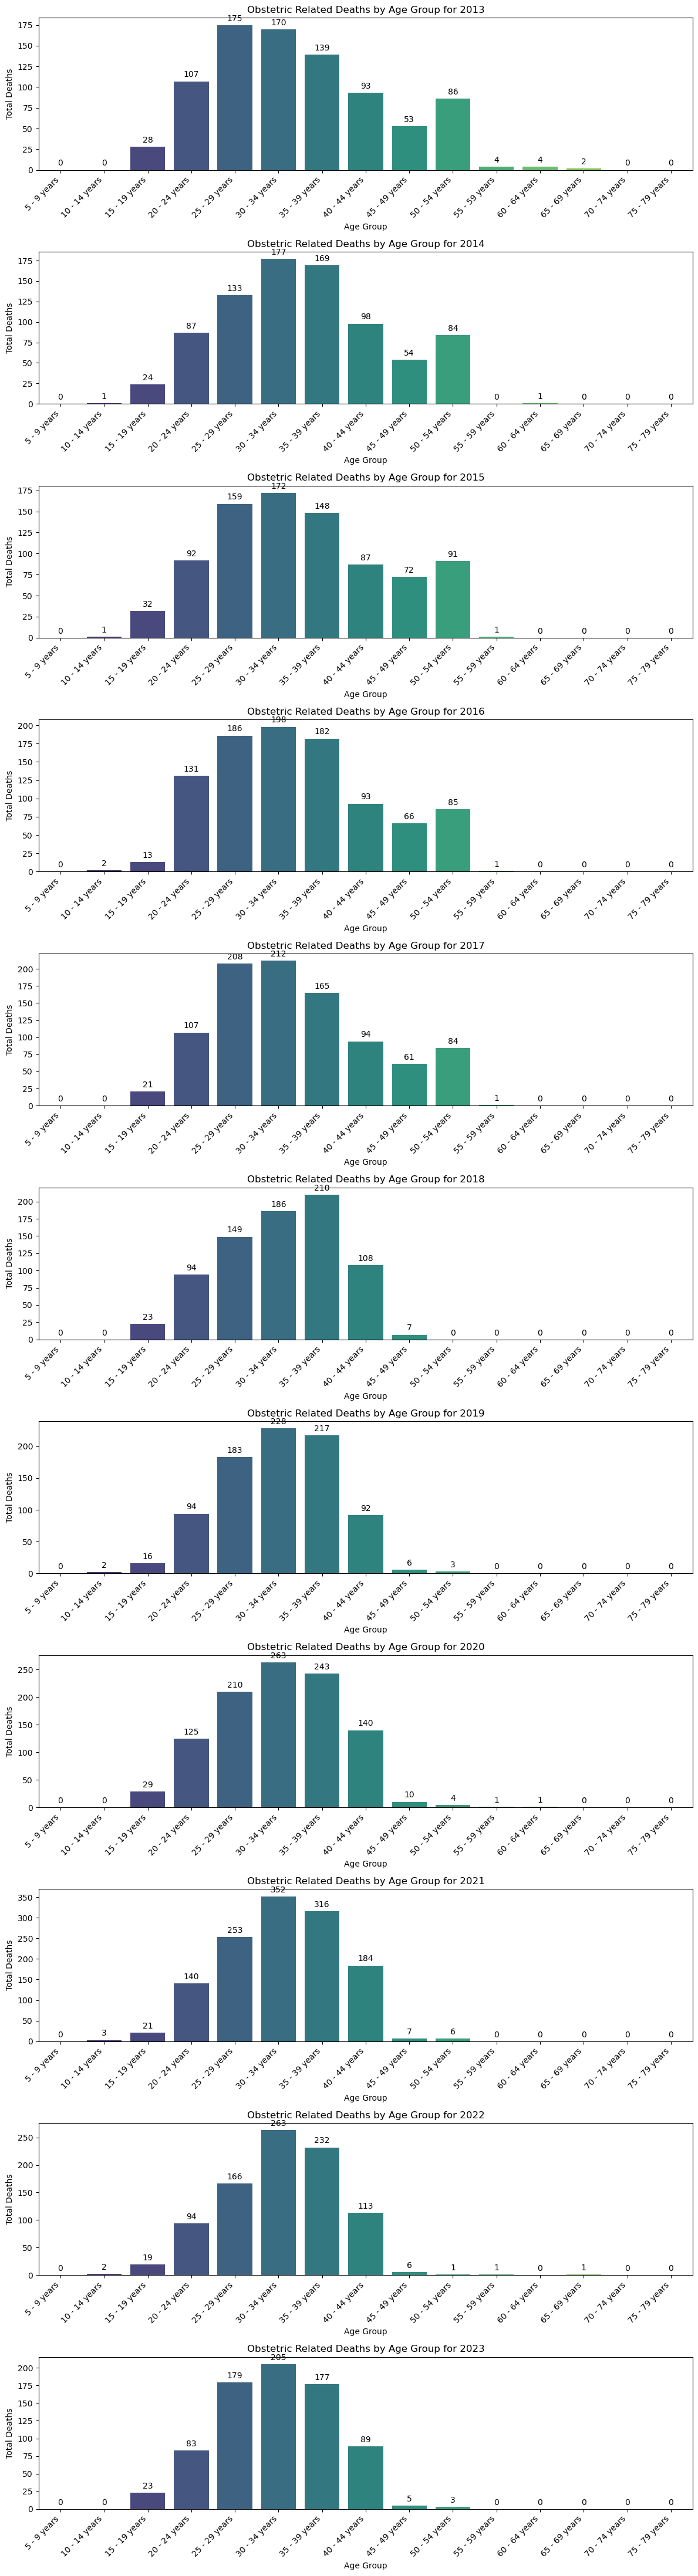

In [247]:
# Define age recode labels
age_recode_labels = {
    '01': 'Under 1 month',
    '02': '1 month - 11 months',
    '03': '1 year',
    '04': '2 years',
    '05': '3 years',
    '06': '4 years',
    '07': '5 - 9 years',
    '08': '10 - 14 years',  # Ensure this is in the right position
    '09': '15 - 19 years',
    '10': '20 - 24 years',
    '11': '25 - 29 years',
    '12': '30 - 34 years',
    '13': '35 - 39 years',
    '14': '40 - 44 years',
    '15': '45 - 49 years',
    '16': '50 - 54 years',
    '17': '55 - 59 years',
    '18': '60 - 64 years',
    '19': '65 - 69 years',
    '20': '70 - 74 years',
    '21': '75 - 79 years',
    '22': '80 - 84 years',
    '23': '85 - 89 years',
    '24': '90 - 94 years',
    '25': '95 - 99 years',
    '26': '100 years and over',
    '27': 'Age not stated'
}

# Apply the age recode labels
df['Age Group'] = df['Age Recode 27'].map(age_recode_labels)

# Explicitly define the order for age groups
age_group_order = [
    '5 - 9 years',
    '10 - 14 years',
    '15 - 19 years',
    '20 - 24 years',
    '25 - 29 years',
    '30 - 34 years',
    '35 - 39 years',
    '40 - 44 years',
    '45 - 49 years',
    '50 - 54 years',
    '55 - 59 years',
    '60 - 64 years',
    '65 - 69 years',
    '70 - 74 years',
    '75 - 79 years'
]

# Convert 'Age Group' to a categorical type with the specified order
df['Age Group'] = pd.Categorical(df['Age Group'], categories=age_group_order, ordered=True)

# Filter and group data by year and age group
age_deaths_by_year = df.groupby(['Year', 'Age Group']).size().reset_index(name='Total Deaths')

# Get the unique years for plotting
unique_years = df['Year'].unique()
num_years = len(unique_years)

# Setup plot for each year with shared x-axis
fig, axes = plt.subplots(num_years, 1, figsize=(12, 4 * num_years), sharex=False)

for ax, year in zip(axes, sorted(unique_years)):
    # Subset data for the year
    data_for_year = age_deaths_by_year[age_deaths_by_year['Year'] == year]
    sns.barplot(x='Age Group', y='Total Deaths', hue='Age Group', data=data_for_year, ax=ax, palette='viridis', legend=False)
    ax.set_title(f'Obstetric Related Deaths by Age Group for {year}')
    ax.set_ylabel('Total Deaths')
    # Explicitly set x-ticks and x-tick labels
    ax.set_xticks(range(len(age_group_order)))
    ax.set_xticklabels(age_group_order, rotation=45, ha='right')

    # Add total value labels on top of each bar
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f'{int(height)}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height), 
                    xytext=(0, 3),  # offset text position
                    textcoords='offset points', 
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

C:\Users\saman\AppData\Local\Temp\ipykernel_23852\2766848214.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_deaths_by_year = df.groupby(['Year', 'Age Group']).size().reset_index(name='Total Deaths')


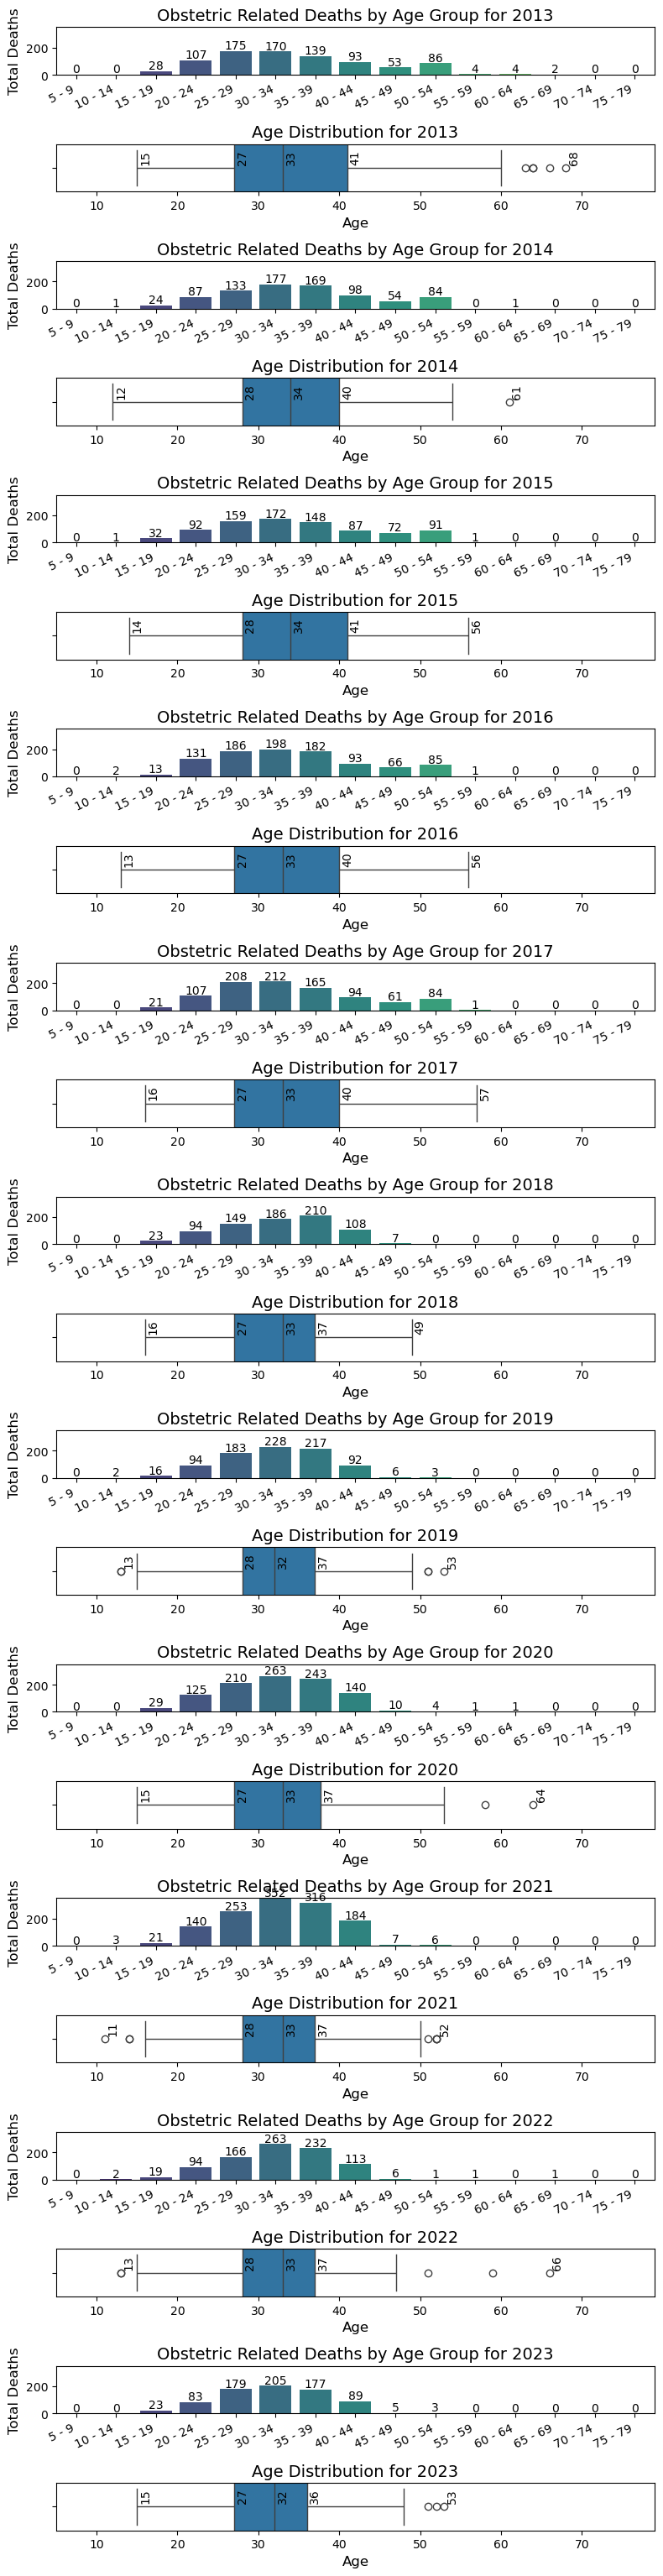

In [275]:
# Function to convert detail age to years
def convert_detail_age(row):
    age_unit = row['Detail Age'][0]  # First character: age unit indicator
    age_value = int(row['Detail Age'][1:])  # Remaining characters: age value

    if age_unit == '1':
        return age_value  # Already in years
    elif age_unit == '2':
        return age_value / 12  # Convert months to years
    elif age_unit == '4':
        return age_value / 365  # Convert days to years
    elif age_unit == '5':
        return age_value / (365 * 24)  # Convert hours to years
    elif age_unit == '6':
        return age_value / (365 * 24 * 60)  # Convert minutes to years
    elif age_unit == '9':
        return None  # Age not stated
    else:
        return None

# Apply conversion to generate 'Age in Years'
df['Age in Years'] = df.apply(convert_detail_age, axis=1)

# Convert 'Age Group' to a categorical type with the specified order
df['Age Group'] = pd.Categorical(df['Age Group'], categories=age_group_order, ordered=True)

# Filter and group data by year and age group
age_deaths_by_year = df.groupby(['Year', 'Age Group']).size().reset_index(name='Total Deaths')

# Get the unique years for plotting
unique_years = df['Year'].unique()
num_years = len(unique_years)

# Define age range for the plots
age_range_min = 5
age_range_max = 79

# Setup plot for each year with shared x-axis
fig, axes = plt.subplots(num_years * 2, 1, figsize=(8, 2.8 * num_years), sharex=False)

for i, year in enumerate(sorted(unique_years)):
    ax_bar = axes[i * 2]       # Bar plot for the year
    ax_box = axes[i * 2 + 1]   # Box plot for the year
    
    # Subset data for the year for bar plot
    data_for_year = age_deaths_by_year[age_deaths_by_year['Year'] == year]
    sns.barplot(
        x='Age Group', y='Total Deaths', hue='Age Group', 
        data=data_for_year, ax=ax_bar, palette='viridis', legend=False
    )
    ax_bar.set_title(f'Obstetric Related Deaths by Age Group for {year}', fontsize=14)  # Increase title font size
    ax_bar.set_ylabel('Total Deaths', fontsize=12)  # Increase y-label font size
    ax_bar.set_xlabel('', fontsize=12)  # If you have it, adjust x-label font size
    
    # Assuming original labels contain " Years", strip it from labels
    cleaned_labels = [label.replace(" years", "") for label in age_group_order]
    
    # Set tick positions and labels explicitly with larger font size
    ticks = range(len(age_group_order))
    ax_bar.set_xticks(ticks)
    ax_bar.set_xticklabels(cleaned_labels, rotation=25, ha='right', fontsize=10)  # Increase tick label font size

    # Adjust y-axis limit to create extra space at the top of the plot
    ax_bar.set_ylim(0, max_height * 50)

    # Add total value labels on top of each bar with increased font size
    for bar in ax_bar.patches:
        height = bar.get_height()
        ax_bar.annotate(f'{int(height)}', 
                        xy=(bar.get_x() + bar.get_width() / 2, height), 
                        xytext=(0, -0.3),  # offset text position
                        textcoords='offset points', 
                        ha='center', va='bottom', fontsize=10)

    # Create a box and whisker plot for the age distribution with x-axis for age
    data_for_year_ages = df[df['Year'] == year]
    sns.boxplot(x='Age in Years', data=data_for_year_ages, ax=ax_box, width=1.5)
    ax_box.set_title(f'Age Distribution for {year}', fontsize=14)  # Increase title font size
    ax_box.set_ylabel('', fontsize=12)
    ax_box.set_xlabel('Age', fontsize=12)  # Set and increase x-label font size

    # Set the age range to be consistent with the bar charts
    ax_box.set_xlim(age_range_min, age_range_max)

    # Annotate significant points of the box plot with bigger font size
    stats = data_for_year_ages['Age in Years'].describe()
    q1 = stats['25%']
    median = stats['50%']
    q3 = stats['75%']
    min_val = stats['min']
    max_val = stats['max']
    
    for point in [min_val, q1, median, q3, max_val]:
        ax_box.annotate(f'{int(point)}',  # No decimal places
                        xy=(point, 0.05),  # Minor shift in position for better readability
                        xytext=(7, 5),  # Adjust offset
                        textcoords='offset points', 
                        ha='center', va='bottom', 
                        fontsize=10, color='black', rotation=90)

plt.tight_layout()
plt.show()

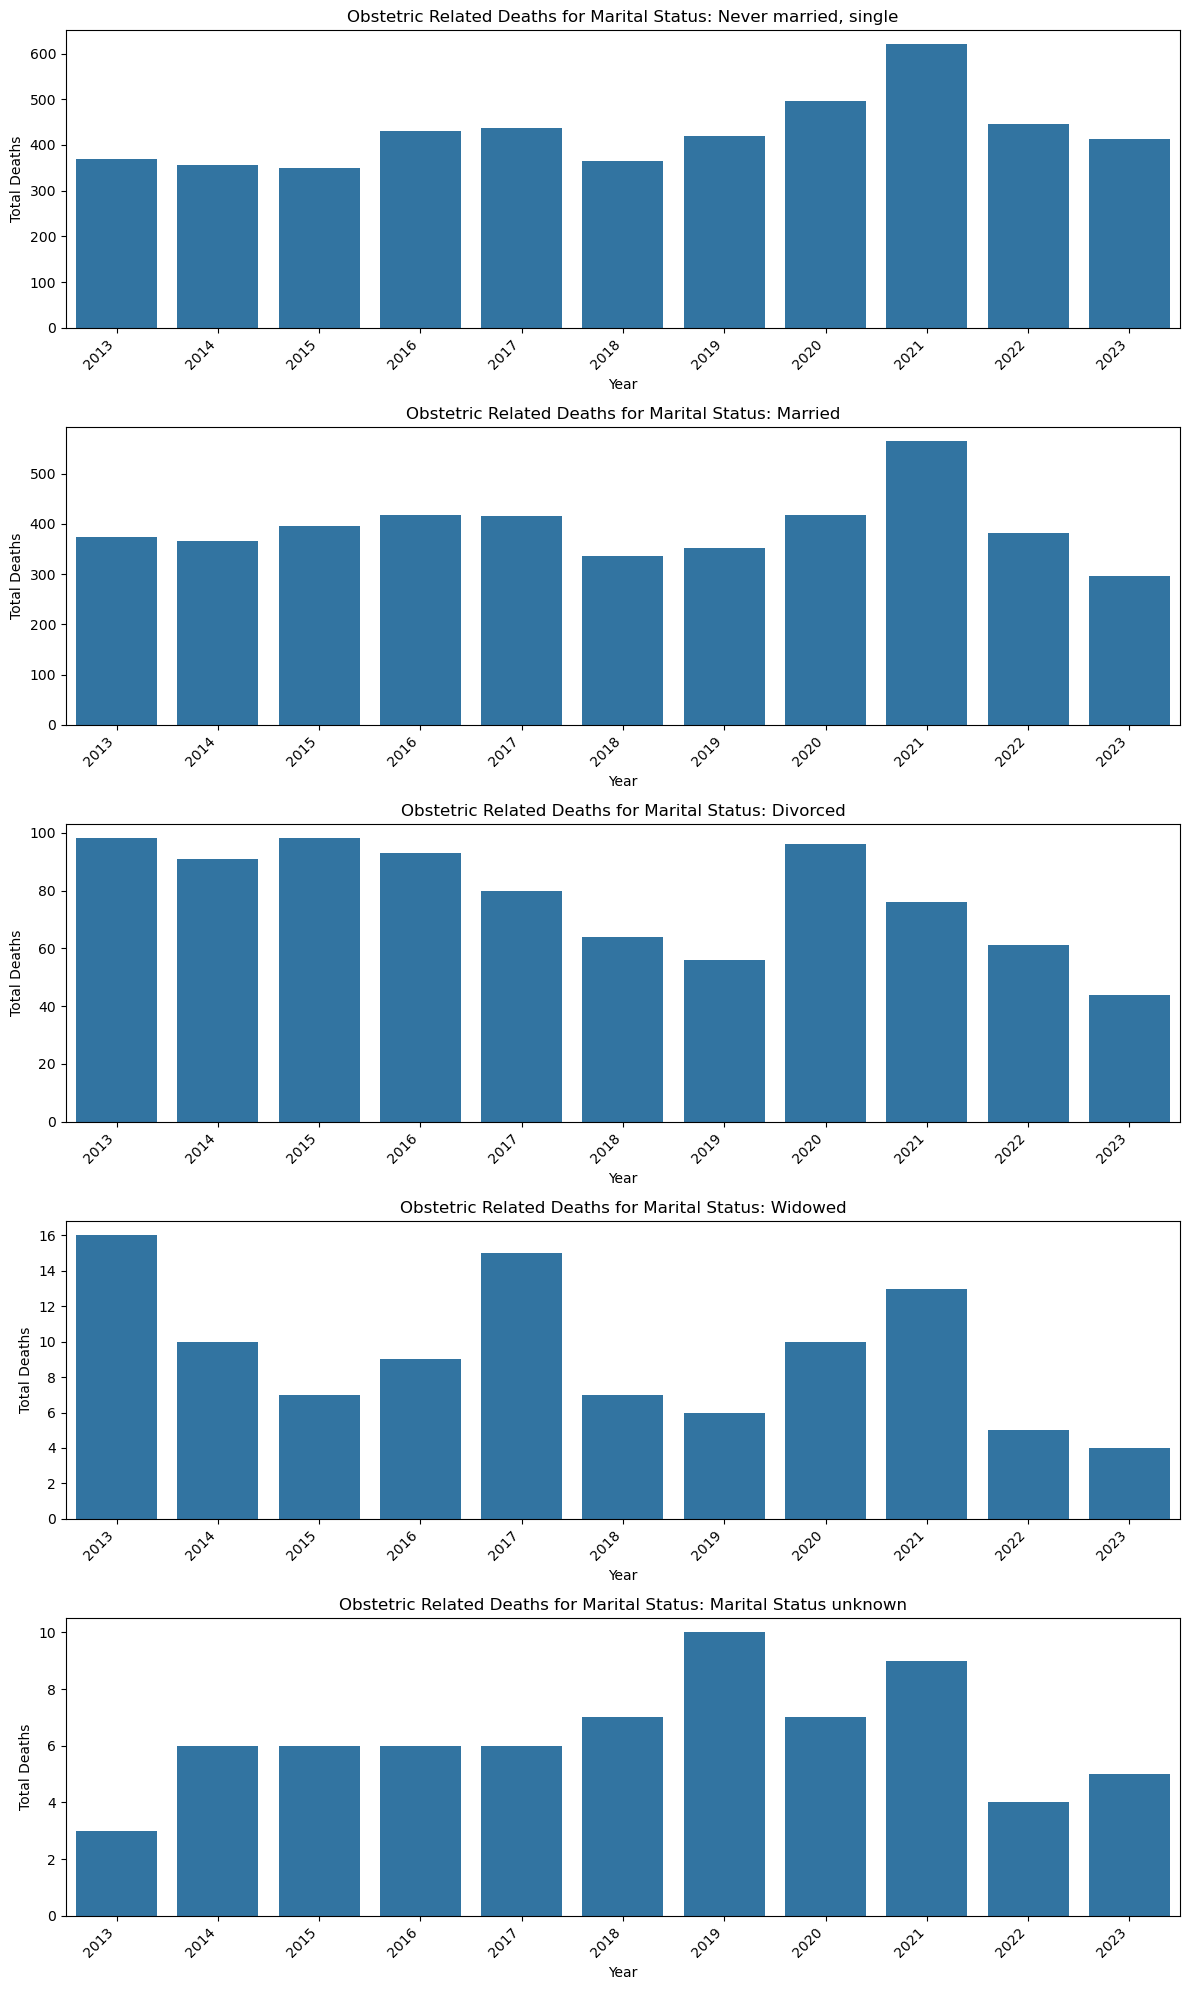

In [306]:
# Marital Status Labels
marital_status_labels = {
    'S': 'Never married, single',
    'M': 'Married',
    'W': 'Widowed',
    'D': 'Divorced',
    'U': 'Marital Status unknown'
}

# Map the marital status to their descriptive labels
df['Marital Status Label'] = df['Marital Status'].map(marital_status_labels)

# Group and aggregate data by year and marital status label
marital_status_deaths = df.groupby(['Year', 'Marital Status Label']).size().reset_index(name='Total Deaths')

# Get unique marital statuses for plotting
unique_marital_statuses = df['Marital Status Label'].unique()
num_plots = len(unique_marital_statuses)

# Define a color palette (one color per race group)
colors = sns.color_palette("gnuplot", num_plots)

# Setup plot for each marital status
fig, axes = plt.subplots(num_plots, 1, figsize=(12, 4 * num_plots))

for ax, marital_status in zip(axes, unique_marital_statuses):
    # Filter the data for the current marital status
    data_for_status = marital_status_deaths[marital_status_deaths['Marital Status Label'] == marital_status]
    sns.barplot(x='Year', y='Total Deaths', data=data_for_status, ax=ax)
    ax.set_title(f'Obstetric Related Deaths for Marital Status: {marital_status}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Total Deaths')
    # Explicitly set the ticks and labels
    ticks = ax.get_xticks()  # Get actual tick positions set by Seaborn
    labels = data_for_status['Year'].tolist()  # Corresponding labels
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Birth Data Proof of Concept

Total number of births: 3605081


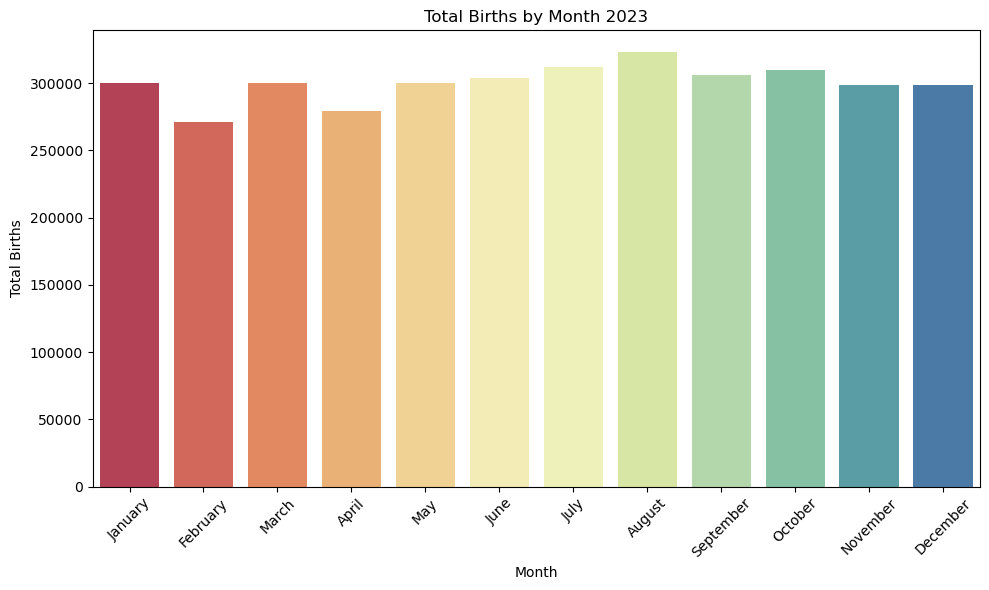

In [183]:
colspecs = [
    (8, 12),  # Birth Year
    (12, 14),  # Birth Month
]
column_names = ["Birth Year", "Birth Month"]

# Read the fixed-width file
df_births = pd.read_fwf('Nat2023PublicUS.c20240509.r20240724.txt', colspecs=colspecs, names=column_names, dtype=str)

# Count the total number of births
total_births = len(df_births)
print(f"Total number of births: {total_births}")

# Map month numbers to month names for better readability
month_names = {
    '01': 'January', '02': 'February', '03': 'March',
    '04': 'April', '05': 'May', '06': 'June',
    '07': 'July', '08': 'August', '09': 'September',
    '10': 'October', '11': 'November', '12': 'December'
}

# Group by Birth Month and count entries
monthly_births = df_births['Birth Month'].value_counts().reset_index()
monthly_births.columns = ['Birth Month', 'Total Births']

# Ensure numerical sorting of months
monthly_births = monthly_births.sort_values(by='Birth Month')

# Convert month numbers to names for plotting
monthly_births['Month Name'] = monthly_births['Birth Month'].map(month_names)

# Plotting the total births by month
plt.figure(figsize=(10, 6))
sns.barplot(x='Month Name', y='Total Births', hue='Month Name', data=monthly_births, order=month_names.values(), palette='Spectral', legend=False)
plt.title('Total Births by Month 2023')
plt.xlabel('Month')
plt.ylabel('Total Births')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

## Import Birth Data
This is important for calculating maternal mortality

In [179]:
colspecs = [
    (8, 12),  # Birth Year
    (12, 14), # Birth Month
    (14, 18),  # Birth Year (2013)
    (18, 20), # Birth Month (2013)
    (104, 106), # Race
    # Race for 2013 births has been left off because the data wasn't where it was supposed to be
]
column_names = ["Year", "Birth Month", "Birth Year (2013)","Birth Month (2013)", "Race"]

files = [
    'Nat2023PublicUS.c20240509.r20240724.txt',
    'Nat2022PublicUS.c20230504.r20230822.txt',
    'Nat2021US.txt',
    'Nat2020PublicUS.c20210506.r20210812.txt',
    'Nat2019PublicUS.c20200506.r20200915.txt',
    'Nat2018PublicUS.c20190509.r20190717.txt',
    'Nat2017PublicUS.c20180516.r20180808.txt',
    'Nat2016PublicUS.c20170517.r20190620.txt',
    'Nat2015PublicUS.c20160517.r20160907.txt',
    'Nat2014PublicUS.c20150514.r20151022.txt'
    #'Nat2013PublicUS.r20141016' #this is complicating things too much
]

dataframes = []
for file in files:
    df_births_year = pd.read_fwf(file, colspecs=colspecs, names=column_names, dtype=str)
    dataframes.append(df_births_year)
    print("file " + file + " parsed")
df_births_comb = pd.concat(dataframes, ignore_index=True)



file Nat2023PublicUS.c20240509.r20240724.txt parsed
file Nat2022PublicUS.c20230504.r20230822.txt parsed
file Nat2021US.txt parsed
file Nat2020PublicUS.c20210506.r20210812.txt parsed
file Nat2019PublicUS.c20200506.r20200915.txt parsed
file Nat2018PublicUS.c20190509.r20190717.txt parsed
file Nat2017PublicUS.c20180516.r20180808.txt parsed
file Nat2016PublicUS.c20170517.r20190620.txt parsed
file Nat2015PublicUS.c20160517.r20160907.txt parsed
file Nat2014PublicUS.c20150514.r20151022.txt parsed


In [181]:
df_births_combined = df_births_comb
print("...")

def map_race(row):
    if pd.isna(row["Year"]):
        return None
    elif 2014 <= int(row["Year"]) <= 2023:
        return race_mapping_2021.get(row['Race'], row['Race']) #feeding it all through the same recode for simplicity
    return row['Race']

print("...")
df_births_combined['Race'] = df_births_combined.apply(map_race, axis=1)

df_births_combined['Year'] = df_births_combined['Year'].astype(int)

print("...")
print("birth data compiled")

...
...
...
birth data compiled


Total number of births: 37937754
   Year  Total Births
0  2014       3998175
1  2015       3988733
2  2016       3956112
3  2017       3864754
4  2018       3801534
5  2019       3757582
8  2020       3619826
7  2021       3669928
6  2022       3676029
9  2023       3605081


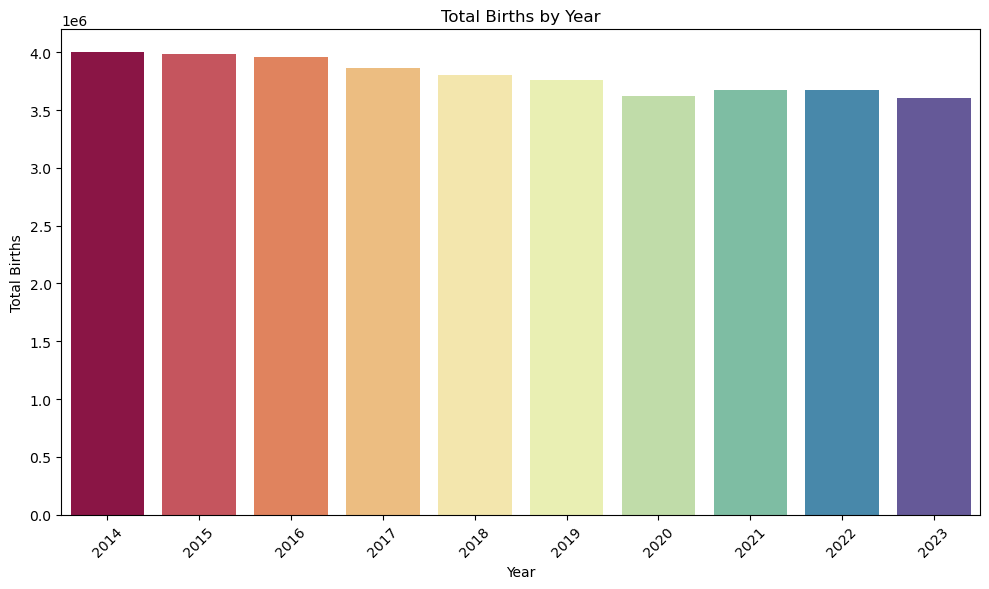

In [148]:
# Count the total number of births
total_births = len(df_births_combined)
print(f"Total number of births: {total_births}")

# Group by Birth Year and count entries
yearly_births = df_births_combined['Year'].value_counts().reset_index()
yearly_births.columns = ['Year', 'Total Births']

# Ensure numerical sorting of years
yearly_births = yearly_births.sort_values(by='Year')
print(yearly_births)

sns.reset_defaults()
# Plotting the total births by year
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Total Births', data=yearly_births, palette='Spectral', hue='Year', legend=False)
plt.title('Total Births by Year')
plt.xlabel('Year')
plt.ylabel('Total Births')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

## Calculate Total Maternal Mortality
A similar chart exists somewhere on the cdc site for maternal mortality without the data from 2023

    Year  Mortality Rate
0   2013             inf
1   2014       14.656687
2   2015       14.540958
3   2016       15.520289
4   2017       16.223542
5   2018       13.678689
6   2019       14.583847
7   2020       17.569905
8   2021       22.398260
9   2022       12.948755
10  2023       11.456053


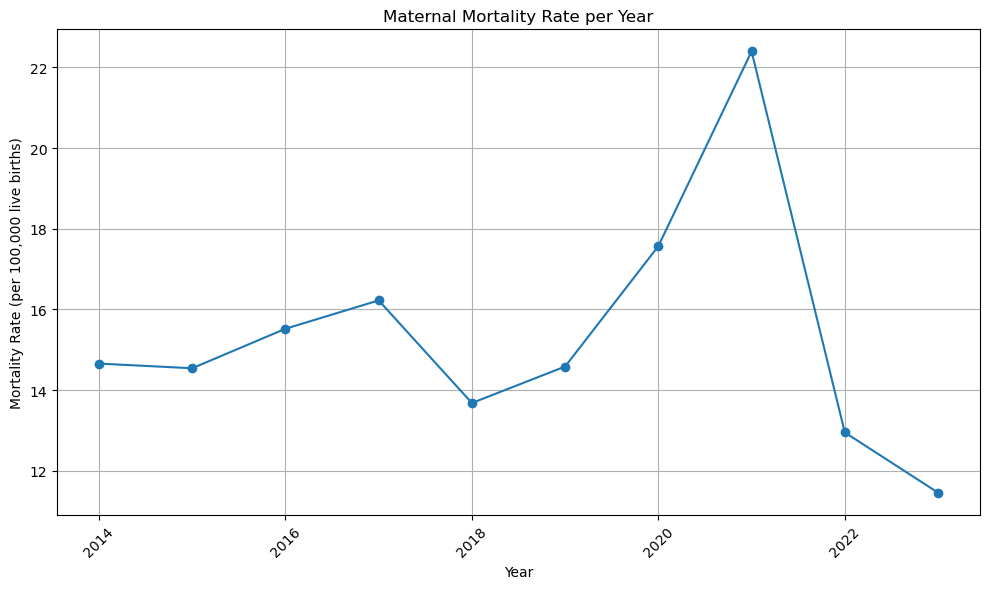

In [189]:
# Function to determine maternal death by CDC standards
def is_maternal_death(icd_code):
    return (
        icd_code == 'A34' or
        ('O00' <= icd_code <= 'O95') or
        ('O98' <= icd_code <= 'O99')
    )

# Add a column to identify maternal deaths in df_full
df_full['Maternal Death'] = df_full['ICD Code'].apply(is_maternal_death)

# Group by year and calculate the number of maternal deaths
maternal_deaths_per_year = df_full[df_full['Maternal Death']].groupby('Year').size()

# Group the births by year and count them
births_per_year = df_births_combined.groupby('Year').size()

# Ensure both Series are using the same year index name
maternal_deaths_per_year.index.name = 'Year'
births_per_year.index.name = 'Year'

# Align both Series to cover the same set of years
all_years = sorted(set(maternal_deaths_per_year.index).union(set(births_per_year.index)))

maternal_deaths_per_year = maternal_deaths_per_year.reindex(all_years, fill_value=0)
births_per_year = births_per_year.reindex(all_years, fill_value=0)

# Calculate the maternal mortality rate per year
mortality_rate_per_year = (maternal_deaths_per_year / births_per_year) * 100000

# Reset the index for a DataFrame format
mortality_rate_per_year = mortality_rate_per_year.reset_index(name='Mortality Rate')

# Print the table of mortality rates
print(mortality_rate_per_year)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(mortality_rate_per_year['Year'], mortality_rate_per_year['Mortality Rate'], marker='o', linestyle='-')
plt.title('Maternal Mortality Rate per Year')
plt.xlabel('Year')
plt.ylabel('Mortality Rate (per 100,000 live births)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Maternal Mortality by Race
Important to look at racial disparities in maternal mortality

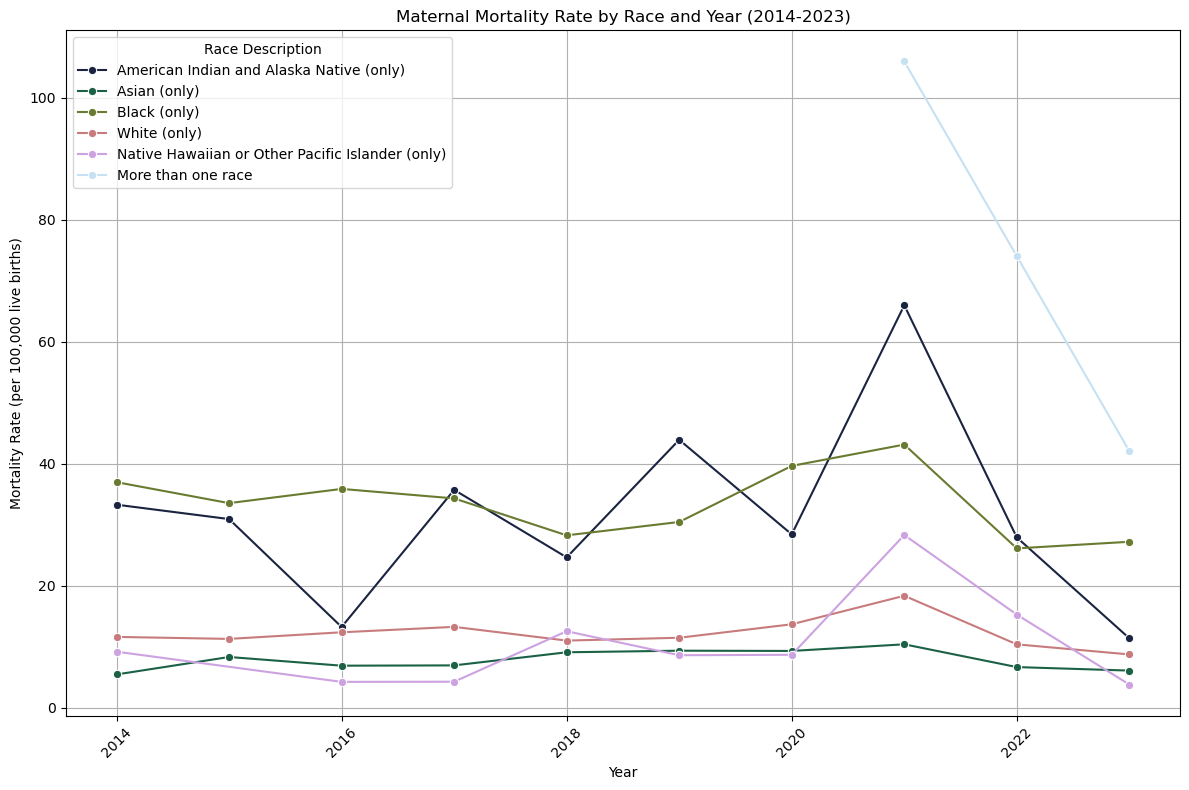

In [320]:
# I had this working for multiple hours before the deadline (with 2013 data in there too...) but didn't take a picture of it because I wanted to edit 
# how the data was displayed in the table to display better to see if maybe part of that would be a good figure as a table (and then try and produce 
# some better statistics with it), and then I somehow messed up the data and since I only had like 2 and a half hours left I started panicking and with  
# the super long run times with some of the data parsing and my headache from suprise roofing for the past two days at my apartment it was not a winning 
# combo

# Define the dictionary to map race recode to descriptive labels
race_labels = {
    '1': 'White (only)',
    '2': 'Black (only)',
    '3': 'American Indian and Alaska Native (only)',
    '4': 'Asian (only)',
    '5': 'Native Hawaiian or Other Pacific Islander (only)',
    '6': 'More than one race'
}

# Add a column to identify maternal deaths in df_full
df_full['Maternal Death'] = df_full['ICD Code'].apply(is_maternal_death)

# Convert 'Year' from object to int32
df_births_combined['Year'] = df_births_combined['Year'].astype('int32')
df_full['Year'] = df_full['Year'].astype('int32')


# Map race labels to more descriptive names
if 'Race Description' not in df_full.columns:
    df_full['Race Description'] = df_full['Race'].map(race_labels)

if 'Race Description' not in df_births_combined.columns:
    df_births_combined['Race Description'] = df_births_combined['Race'].map(race_labels)

# Step 2: Group maternal deaths and births by year and race
maternal_deaths_by_year_race = df_full[df_full['Maternal Death']].groupby(['Year', 'Race Description']).size().reset_index(name='Maternal Deaths')
births_by_year_race = df_births_combined.groupby(['Year', 'Race Description']).size().reset_index(name='Total Births')

# Merge data to calculate maternal mortality rate per 100,000 live births
merged_data = pd.merge(maternal_deaths_by_year_race, births_by_year_race, how='left', left_on=['Year', 'Race Description'], right_on=['Year', 'Race Description'])
merged_data['Maternal Mortality Rate'] = (merged_data['Maternal Deaths'] / merged_data['Total Births']) * 100000

# Clean up DataFrame for display
mortality_rate_by_race_year = merged_data[['Year', 'Race Description', 'Maternal Mortality Rate']].sort_values(by=['Year', 'Race Description'])

# Display the DataFrame
#print(mortality_rate_by_race_year)

# Step 3: Plot the data
plt.figure(figsize=(12, 8))
sns.lineplot(data=mortality_rate_by_race_year, x='Year', y='Maternal Mortality Rate', hue='Race Description', palette='cubehelix', marker='o')
plt.title('Maternal Mortality Rate by Race and Year (2014-2023)')
plt.xlabel('Year')
plt.ylabel('Mortality Rate (per 100,000 live births)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Pivot Mortality Data Table
For better reading

In [323]:
# A note to anyone who may be grading this: I definitely did not have anything below this done in any capacity before the deadline, 
# do what you will with that

# Mortality rate data aggregation to handle duplicates
aggregated_data = mortality_rate_by_race_year.groupby(['Year', 'Race Description']).agg({'Maternal Mortality Rate': 'mean'}).reset_index()

# Map Race Description to shorter race labels
race_labels = {
    'White (only)': 'White (only)',
    'Black (only)': 'Black (only)',
    'American Indian and Alaska Native (only)': 'AI and AN (only)',
    'Asian (only)': 'Asian (only)',
    'Native Hawaiian or Other Pacific Islander (only)': 'NH or OPI (only)',
    'More than one race': 'More than one race'
}

aggregated_data['Race Description'] = aggregated_data['Race Description'].map(race_labels)

# Pivot the DataFrame
pivoted_df = aggregated_data.pivot(
    index='Year', 
    columns='Race Description', 
    values='Maternal Mortality Rate'
)

# Optionally reset the index name to None if you want to have a cleaner display
pivoted_df.index.name = None

# Display the DataFrame for the years 2014-2023
years_of_interest = list(range(2014, 2024))
final_df = pivoted_df.loc[years_of_interest]

print(final_df)

Race Description  AI and AN (only)  Asian (only)  Black (only)  \
2014                     33.282130      5.463006     36.970583   
2015                     30.923053      8.321698     33.536845   
2016                     13.240824      6.899387     35.866053   
2017                     35.711342      6.947842     34.308821   
2018                     24.646730      9.094795     28.258073   
2019                     43.912614      9.356485     30.449707   
2020                     28.414742      9.315413     39.639960   
2021                     65.959277     10.401092     43.130326   
2022                     27.915027      6.670500     26.121482   
2023                     11.385955      6.094764     27.204315   

Race Description  More than one race  NH or OPI (only)  White (only)  
2014                             NaN          9.191599     11.614655  
2015                             NaN               NaN     11.288824  
2016                             NaN          4.246645     1

Unique Race Descriptions: ['American Indian and Alaska Native (only)' 'Asian (only)' 'Black (only)'
 'White (only)' 'Native Hawaiian or Other Pacific Islander (only)'
 'More than one race']


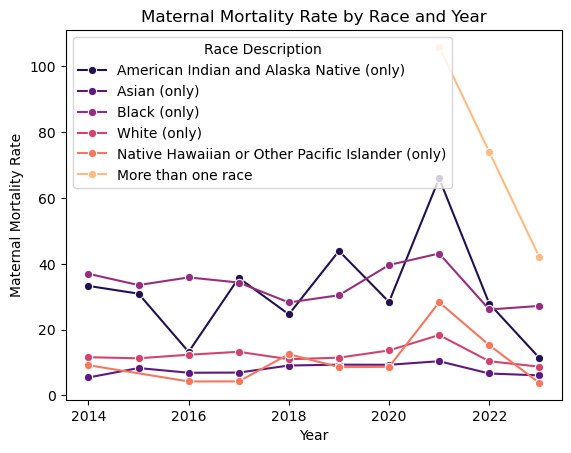

In [243]:
# Making a chart that's more legible for the write up
# Debug: Check the unique values in 'Race Description'
print("Unique Race Descriptions:", mortality_rate_by_race_year['Race Description'].unique())

# Option 1: Try using a predefined palette
sns.lineplot(data=mortality_rate_by_race_year,
             x='Year', y='Maternal Mortality Rate',
             hue='Race Description',
             palette='magma', marker='o')

plt.title('Maternal Mortality Rate by Race and Year')
plt.show()

# Option 2: Use a custom palette
custom_palette = sns.color_palette("deep", n_colors=len(mortality_rate_by_race_year['Race Description'].unique()))

plt.clf()  # Clear the previous plot
sns.lineplot(data=mortality_rate_by_race_year,
             x='Year', y='Maternal Mortality Rate',
             hue='Race Description',
             palette=custom_palette, marker='o')

plt.title('Maternal Mortality Rate by Race and Year with Custom Palette')
plt.show()

## Calculate Mortality Statistics for Black Population vs Others

In [193]:
# Filter the data for the years 2022 and 2023
data_2022_2023 = mortality_rate_by_race_year[mortality_rate_by_race_year['Year'].isin([2022, 2023])]

# Separate data for Black (only) and other races
black_data = data_2022_2023[data_2022_2023['Race Description'] == 'Black (only)']
other_races_data = data_2022_2023[data_2022_2023['Race Description'] != 'Black (only)']

# Calculate average mortality rate for other races in 2022 and 2023
average_other_races_2022 = other_races_data[other_races_data['Year'] == 2022]['Maternal Mortality Rate'].mean()
average_other_races_2023 = other_races_data[other_races_data['Year'] == 2023]['Maternal Mortality Rate'].mean()

# Extract mortality rates for Black (only) in 2022 and 2023
black_rate_2022 = black_data[black_data['Year'] == 2022]['Maternal Mortality Rate'].values[0]
black_rate_2023 = black_data[black_data['Year'] == 2023]['Maternal Mortality Rate'].values[0]

# Calculate differences
difference_black = black_rate_2023 - black_rate_2022
difference_other_races = average_other_races_2023 - average_other_races_2022

# Display the results
print(f"Difference in Maternal Mortality Rate for Black (only) from 2022 to 2023: {difference_black:.2f}")
print(f"Average Difference in Maternal Mortality Rate for Other Races from 2022 to 2023: {difference_other_races:.2f}")

Difference in Maternal Mortality Rate for Black (only) from 2022 to 2023: 1.08
Average Difference in Maternal Mortality Rate for Other Races from 2022 to 2023: -12.43


In [221]:
# Filter data for 2022 and 2023 for Blacks again
black_data = mortality_rate_by_race_year[(mortality_rate_by_race_year['Race Description'] == 'Black (only)') &
                                         (mortality_rate_by_race_year['Year'].isin([2022, 2023]))]

# Check if black_data is not empty and print its contents
if black_data.empty:
    print("No data available for Blacks in 2022 or 2023. Check race description and year format.")
else:
    print("Black Data for 2022 and 2023:", black_data)

# Calculate change in maternal mortality rate for Blacks if data exists
if not black_data.empty:
    black_2023 = black_data.loc[black_data['Year'] == 2023, 'Maternal Mortality Rate']
    black_2022 = black_data.loc[black_data['Year'] == 2022, 'Maternal Mortality Rate']
    
    if not black_2023.empty and not black_2022.empty:
        black_mmr_change = black_2023.values[0] - black_2022.values[0]
        print(f"Change in Maternal Mortality Rate for Blacks from 2022 to 2023: {black_mmr_change}")
    else:
        print("Data for either 2022 or 2023 is missing for Blacks.")
else:
    print("No data to compute Black maternal mortality rate change.")

# Filter data for 2022 and 2023 for all Other races
other_races_data = mortality_rate_by_race_year[(mortality_rate_by_race_year['Race Description'] != 'Black') &
                                               (mortality_rate_by_race_year['Year'].isin([2022, 2023]))]

# Merge to get total maternal deaths and total births for other races
merged_other_data = pd.merge(
    maternal_deaths_by_year_race,
    births_by_year_race,
    how='inner',
    on=['Year', 'Race Description']
)

# Filter for years 2022 and 2023 and exclude Blacks
other_data_2022_2023 = merged_other_data[(merged_other_data['Year'].isin([2022, 2023])) & 
                                         (merged_other_data['Race Description'] != 'Black')]

# Group by year and calculate sum of maternal deaths and births
grouped_other_data = other_data_2022_2023.groupby('Year').sum().reset_index()

# Recalculate Maternal Mortality Rate for other races
grouped_other_data['Maternal Mortality Rate'] = (
    grouped_other_data['Maternal Deaths'] / grouped_other_data['Total Births']) * 100000

# Calculate change in maternal mortality rate for other races
other_mmr_change = grouped_other_data.loc[grouped_other_data['Year'] == 2023, 'Maternal Mortality Rate'].values[0] - \
                   grouped_other_data.loc[grouped_other_data['Year'] == 2022, 'Maternal Mortality Rate'].values[0]

print(f"Change in Maternal Mortality Rate for other races from 2022 to 2023: {other_mmr_change}")

# Comparing results
print(f"Difference in change between Blacks and other races: {black_mmr_change - other_mmr_change}")

Black Data for 2022 and 2023:     Year Race Description  Maternal Mortality Rate
46  2022     Black (only)                26.121482
52  2023     Black (only)                27.204315
Change in Maternal Mortality Rate for Blacks from 2022 to 2023: 1.0828329098915894
Change in Maternal Mortality Rate for other races from 2022 to 2023: -1.4927020249786267
Difference in change between Blacks and other races: 2.575534934870216


In [219]:
# Calculate percentage change for those who are Black
if not black_data.empty and not black_2022.empty:
    black_mmr_2022 = black_2022.values[0]
    # Avoid division by zero
    if black_mmr_2022 != 0:
        black_percentage_change = (black_mmr_change / black_mmr_2022) * 100
    else:
        black_percentage_change = None
    print(f"Percentage change in Maternal Mortality Rate for Blacks from 2022 to 2023: {black_percentage_change}%")
else:
    black_percentage_change = None
    print("Insufficient data to compute percentage change for Blacks.")

# Calculate percentage change for other races
if grouped_other_data.loc[grouped_other_data['Year'] == 2022, 'Maternal Mortality Rate'].values.size > 0:
    other_mmr_2022 = grouped_other_data.loc[grouped_other_data['Year'] == 2022, 'Maternal Mortality Rate'].values[0]
    # Avoid division by zero
    if other_mmr_2022 != 0:
        other_percentage_change = (other_mmr_change / other_mmr_2022) * 100
    else:
        other_percentage_change = None
    print(f"Percentage change in Maternal Mortality Rate for other races from 2022 to 2023: {other_percentage_change}%")
else:
    other_percentage_change = None
    print("Insufficient data to compute percentage change for other races.")

# Comparing percentage changes
if black_percentage_change is not None and other_percentage_change is not None:
    print(f"Difference in percentage change between Blacks and other races: {black_percentage_change - other_percentage_change}%")
else:
    print("Cannot compute difference in percentage changes due to insufficient data.")

Percentage change in Maternal Mortality Rate for Blacks from 2022 to 2023: 4.145373134507642%
Percentage change in Maternal Mortality Rate for other races from 2022 to 2023: -11.527764563403691%
Difference in percentage change between Blacks and other races: 15.673137697911333%
